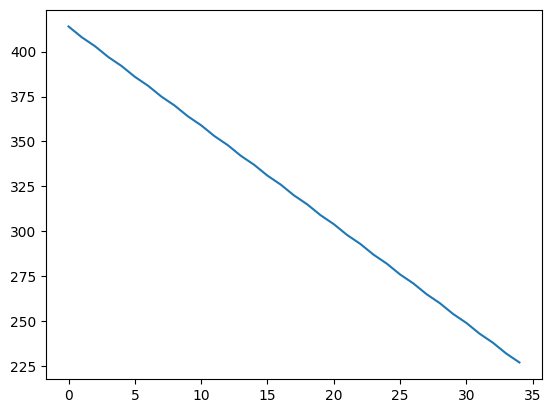

Processing subtraction for image  0
[512 414]
ignoring:  29
start:  -127
end:  -69
[-127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115 -114
 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101 -100
  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87  -86
  -85  -84  -83  -82  -81  -80  -79  -78  -77  -76  -75  -74  -73  -72
  -71  -70]


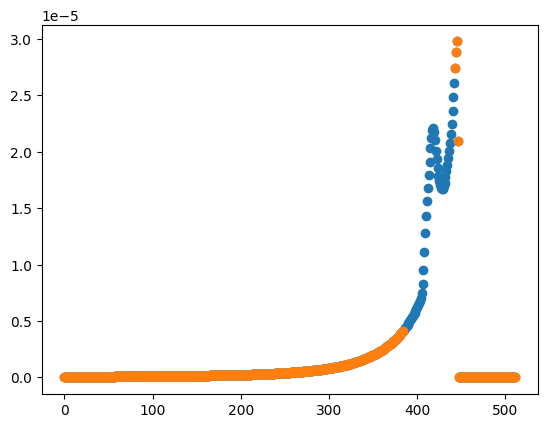

a:  2.702516766566607 b:  -2.0637014123798503e-08


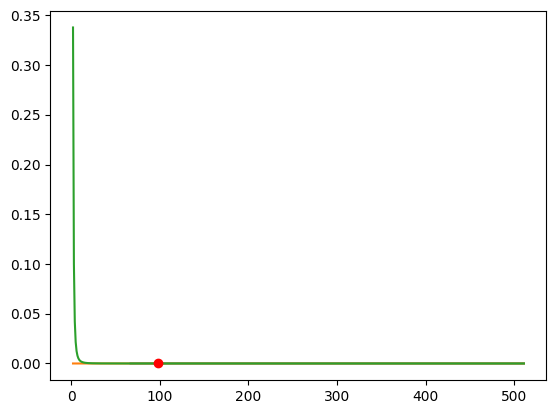

Subtracting  2.85073967263789e-06  from  1.9122946e-05
[512 414]
ignoring:  29
start:  -127
end:  -69
[-127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115 -114
 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101 -100
  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87  -86
  -85  -84  -83  -82  -81  -80  -79  -78  -77  -76  -75  -74  -73  -72
  -71  -70]


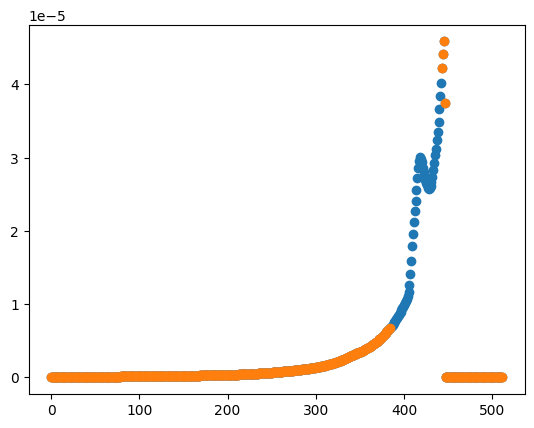

a:  4.345481002051099 b:  -7.476119911783077e-09


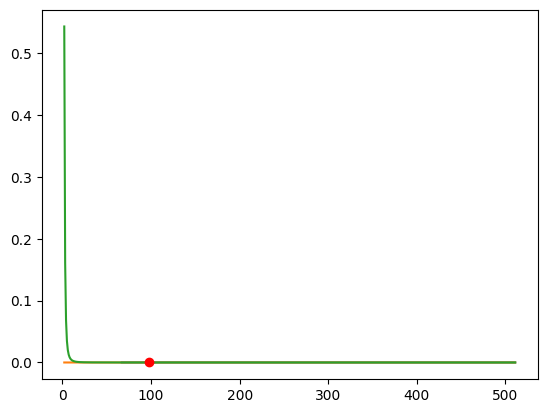

Subtracting  4.60952126431067e-06  from  2.5628242e-05
Processing subtraction for image  1
[512 408]
ignoring:  31
start:  -135
end:  -73
[-135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124 -123 -122
 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111 -110 -109 -108
 -107 -106 -105 -104 -103 -102 -101 -100  -99  -98  -97  -96  -95  -94
  -93  -92  -91  -90  -89  -88  -87  -86  -85  -84  -83  -82  -81  -80
  -79  -78  -77  -76  -75  -74]


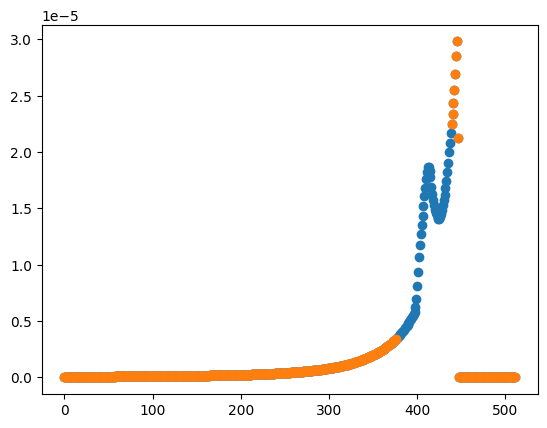

a:  4.283349871066717 b:  -3.0602004618660866e-07


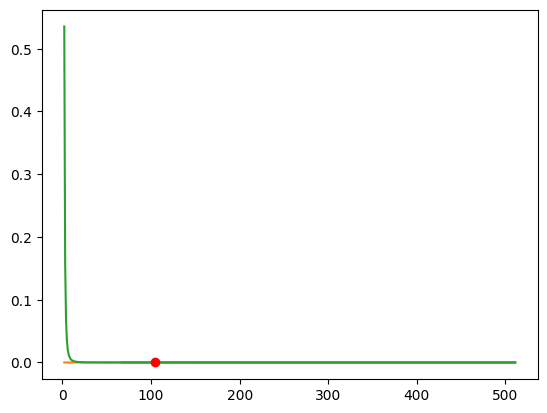

Subtracting  3.501862392105235e-06  from  1.6077312e-05
[512 408]
ignoring:  31
start:  -135
end:  -73
[-135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124 -123 -122
 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111 -110 -109 -108
 -107 -106 -105 -104 -103 -102 -101 -100  -99  -98  -97  -96  -95  -94
  -93  -92  -91  -90  -89  -88  -87  -86  -85  -84  -83  -82  -81  -80
  -79  -78  -77  -76  -75  -74]


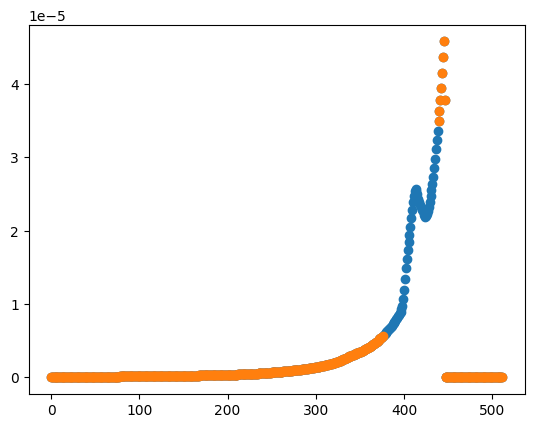

a:  6.7608981851821035 b:  -4.4737129788350127e-07


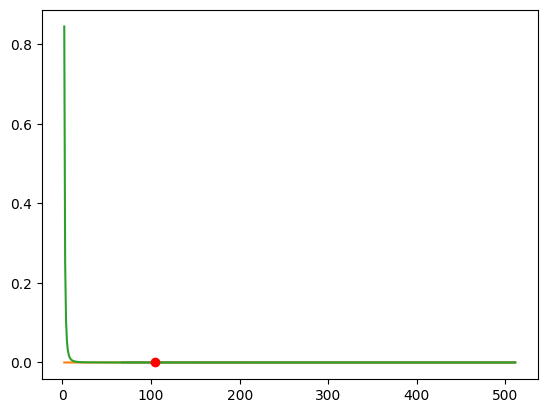

Subtracting  5.5630425700881854e-06  from  2.1671305e-05
Processing subtraction for image  2
[512 403]
ignoring:  32
start:  -141
end:  -77
[-141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131 -130 -129 -128
 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115 -114
 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101 -100
  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87  -86
  -85  -84  -83  -82  -81  -80  -79  -78]


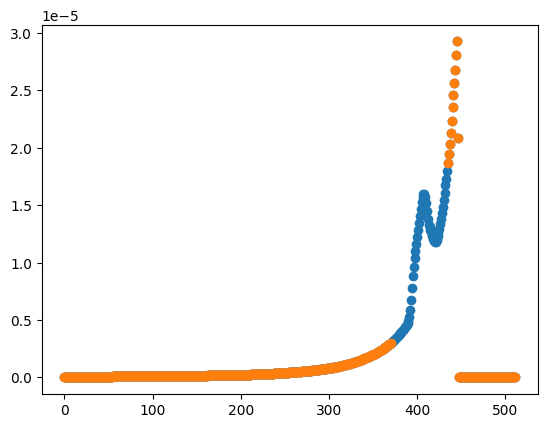

a:  5.420866159722887 b:  -4.7677304579952804e-07


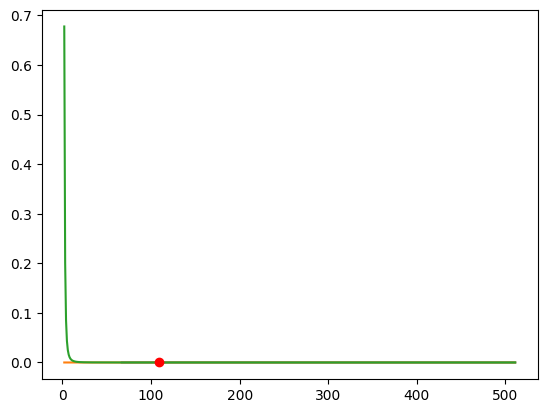

Subtracting  3.7091302503605476e-06  from  1.4092689e-05
[512 403]
ignoring:  32
start:  -141
end:  -77
[-141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131 -130 -129 -128
 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115 -114
 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101 -100
  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87  -86
  -85  -84  -83  -82  -81  -80  -79  -78]


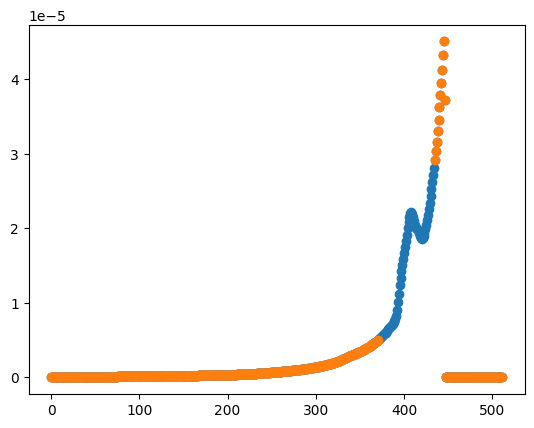

a:  8.500620496847779 b:  -7.101483178602044e-07


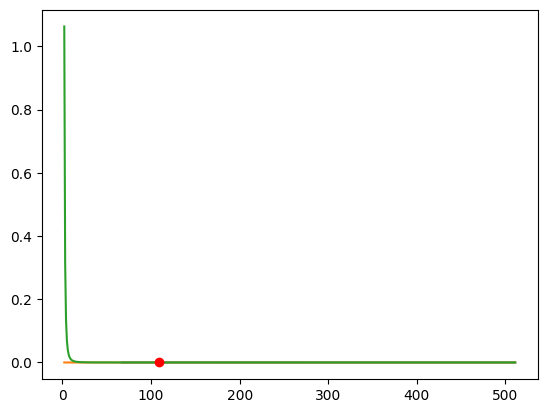

Subtracting  5.853890400074126e-06  from  1.9161615e-05
Processing subtraction for image  3
[512 397]
ignoring:  34
start:  -149
end:  -81
[-149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138 -137 -136
 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124 -123 -122
 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111 -110 -109 -108
 -107 -106 -105 -104 -103 -102 -101 -100  -99  -98  -97  -96  -95  -94
  -93  -92  -91  -90  -89  -88  -87  -86  -85  -84  -83  -82]


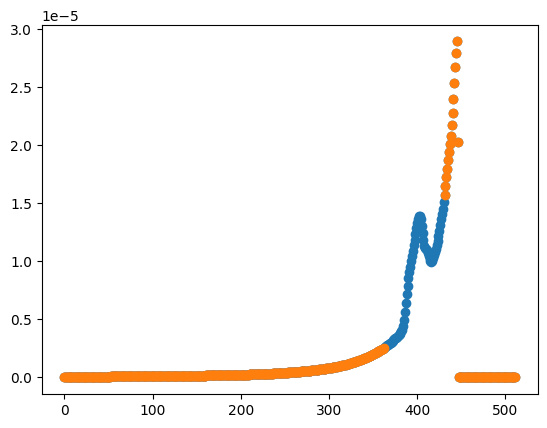

a:  6.143541904274279 b:  -5.783573039871476e-07


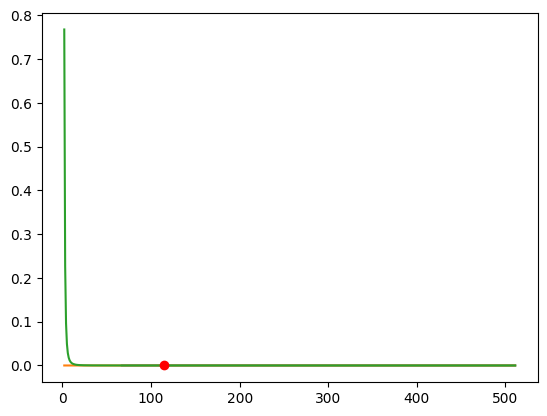

Subtracting  3.4611212226993188e-06  from  1.1861473e-05
[512 397]
ignoring:  34
start:  -149
end:  -81
[-149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138 -137 -136
 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124 -123 -122
 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111 -110 -109 -108
 -107 -106 -105 -104 -103 -102 -101 -100  -99  -98  -97  -96  -95  -94
  -93  -92  -91  -90  -89  -88  -87  -86  -85  -84  -83  -82]


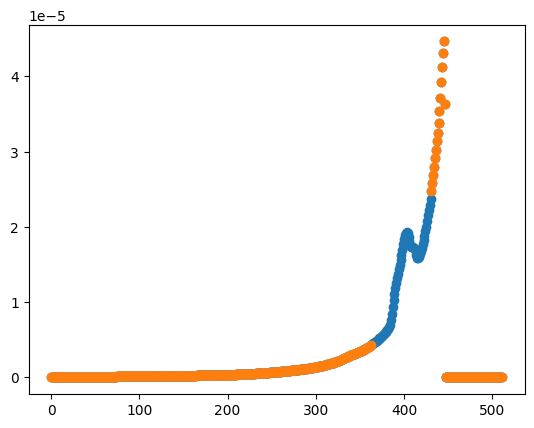

a:  9.624289552387193 b:  -8.716187107887149e-07


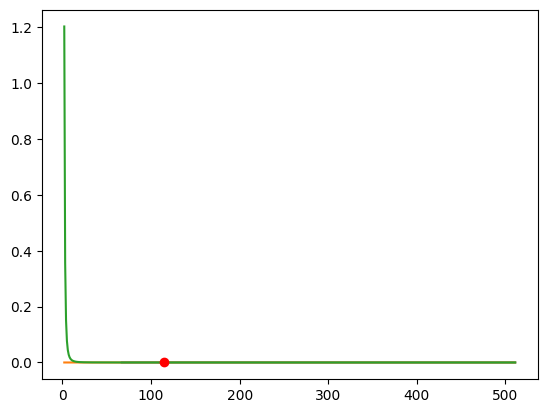

Subtracting  5.456507895531459e-06  from  1.6235297e-05
Processing subtraction for image  4
[512 392]
ignoring:  36
start:  -156
end:  -84
[-156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144 -143
 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131 -130 -129
 -128 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115
 -114 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101
 -100  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87
  -86  -85]


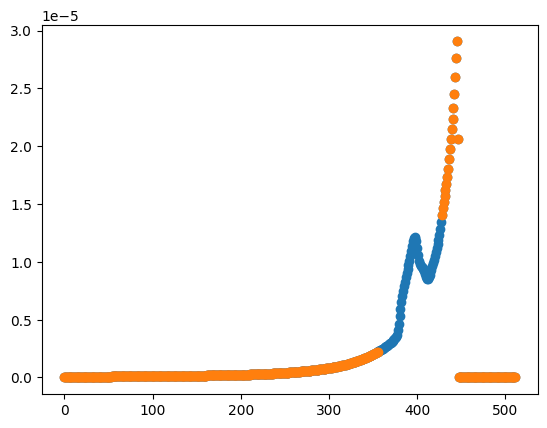

a:  6.442628068539567 b:  -6.15777105946483e-07


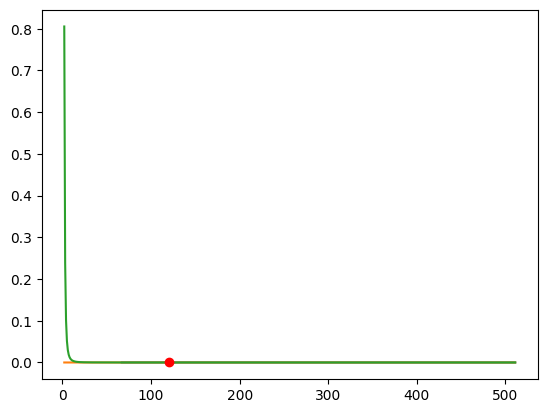

Subtracting  3.1125956189028033e-06  from  1.0512416e-05
[512 392]
ignoring:  36
start:  -156
end:  -84
[-156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144 -143
 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131 -130 -129
 -128 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115
 -114 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101
 -100  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87
  -86  -85]


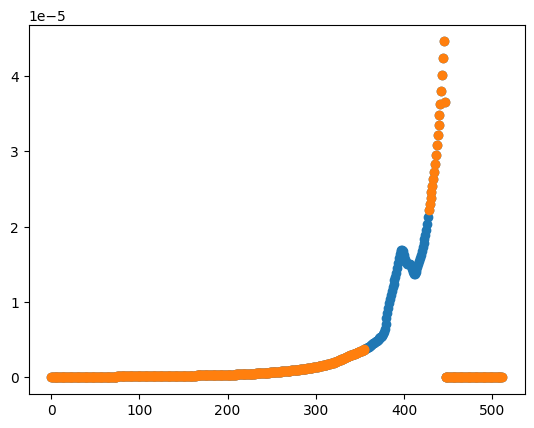

a:  10.106480022718204 b:  -9.355065545372354e-07


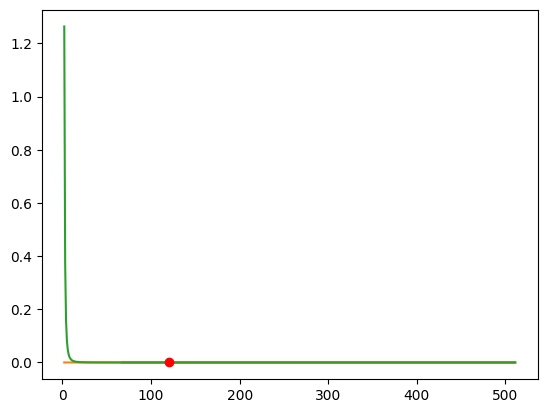

Subtracting  4.91315086601728e-06  from  1.4498724e-05
Processing subtraction for image  5
[512 386]
ignoring:  37
start:  -163
end:  -89
[-163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152 -151 -150
 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138 -137 -136
 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124 -123 -122
 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111 -110 -109 -108
 -107 -106 -105 -104 -103 -102 -101 -100  -99  -98  -97  -96  -95  -94
  -93  -92  -91  -90]


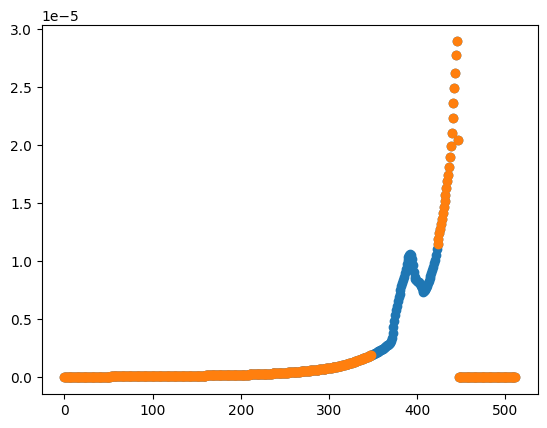

a:  6.895142090531574 b:  -6.387487730332949e-07


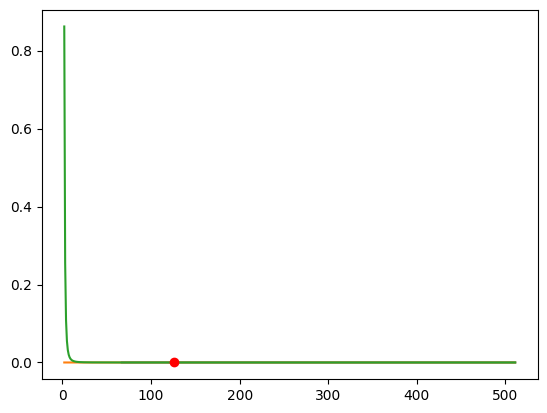

Subtracting  2.8081742507040297e-06  from  8.982532e-06
[512 386]
ignoring:  37
start:  -163
end:  -89
[-163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152 -151 -150
 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138 -137 -136
 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124 -123 -122
 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111 -110 -109 -108
 -107 -106 -105 -104 -103 -102 -101 -100  -99  -98  -97  -96  -95  -94
  -93  -92  -91  -90]


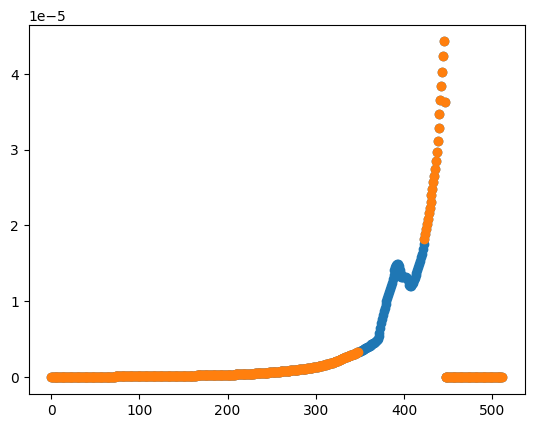

a:  10.811743558296538 b:  -9.71317210336209e-07


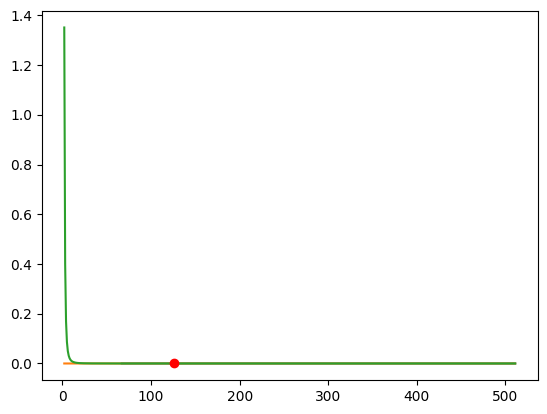

Subtracting  4.4335384559467984e-06  from  1.2446343e-05
Processing subtraction for image  6
[512 381]
ignoring:  39
start:  -170
end:  -92
[-170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159 -158 -157
 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144 -143
 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131 -130 -129
 -128 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115
 -114 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101
 -100  -99  -98  -97  -96  -95  -94  -93]


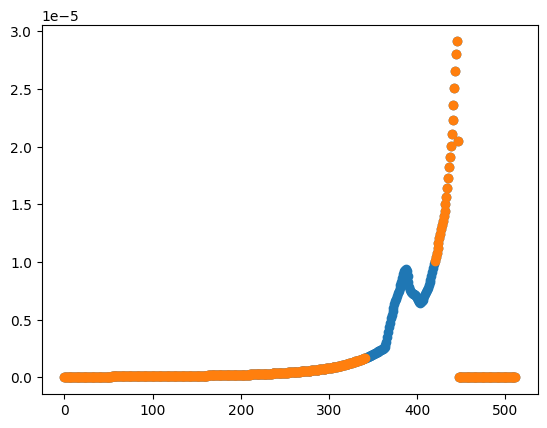

a:  7.064086720166937 b:  -6.554845377172365e-07


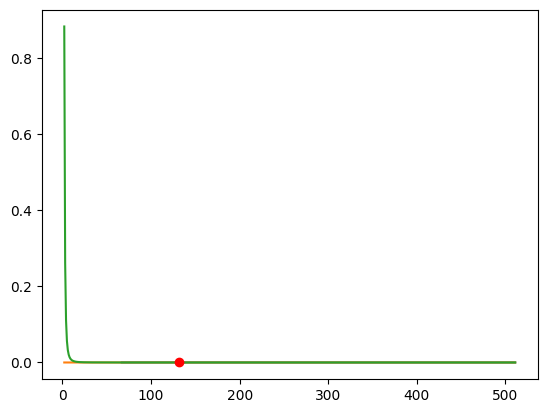

Subtracting  2.4867755932858846e-06  from  7.998507e-06
[512 381]
ignoring:  39
start:  -170
end:  -92
[-170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159 -158 -157
 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144 -143
 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131 -130 -129
 -128 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115
 -114 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101
 -100  -99  -98  -97  -96  -95  -94  -93]


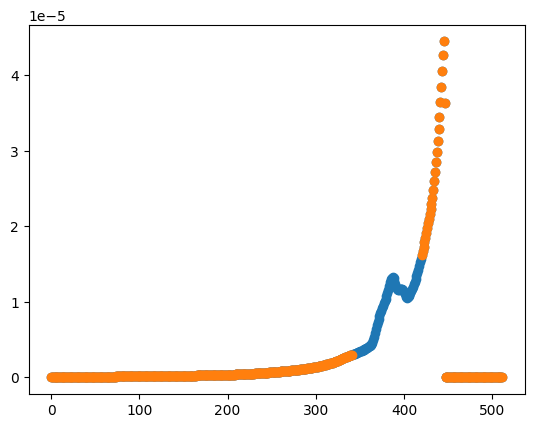

a:  11.066028586375648 b:  -9.96839667997138e-07


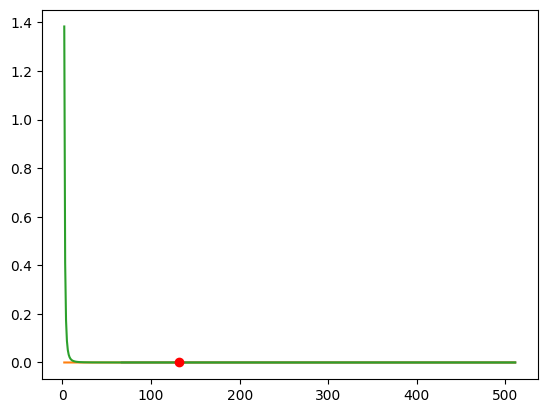

Subtracting  3.925571651818496e-06  from  1.1156041e-05
Processing subtraction for image  7
[512 375]
ignoring:  41
start:  -178
end:  -96
[-178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167 -166 -165
 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152 -151
 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138 -137
 -136 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124 -123
 -122 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111 -110 -109
 -108 -107 -106 -105 -104 -103 -102 -101 -100  -99  -98  -97]


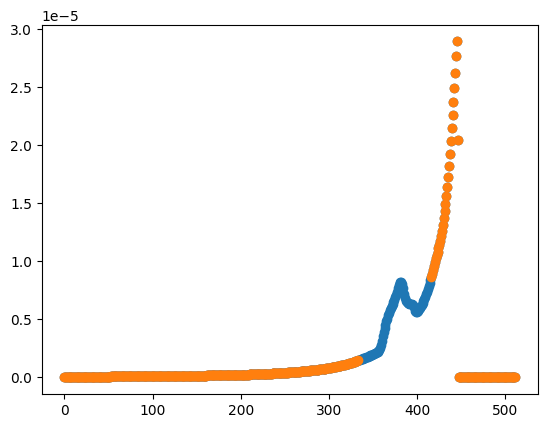

a:  7.247090833875098 b:  -6.603696659483346e-07


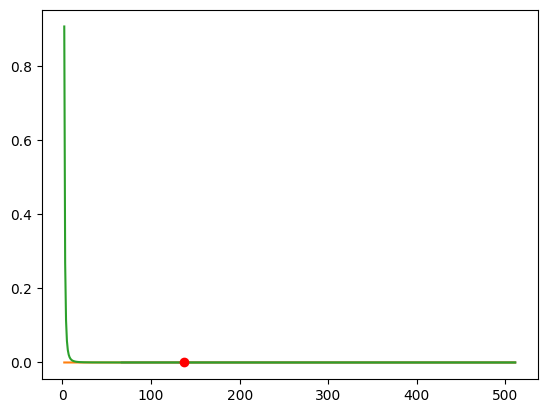

Subtracting  2.1580262656390815e-06  from  6.907364e-06
[512 375]
ignoring:  41
start:  -178
end:  -96
[-178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167 -166 -165
 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152 -151
 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138 -137
 -136 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124 -123
 -122 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111 -110 -109
 -108 -107 -106 -105 -104 -103 -102 -101 -100  -99  -98  -97]


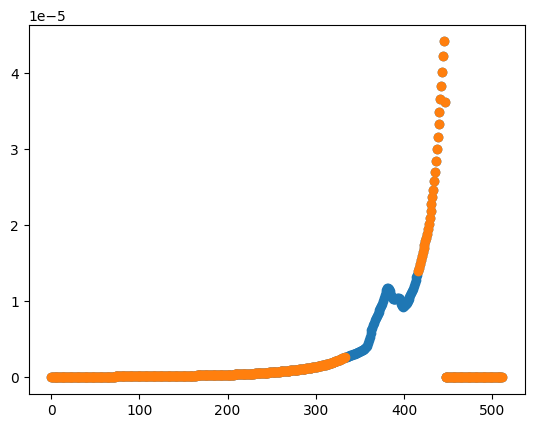

a:  11.345316279249069 b:  -1.0044772498167496e-06


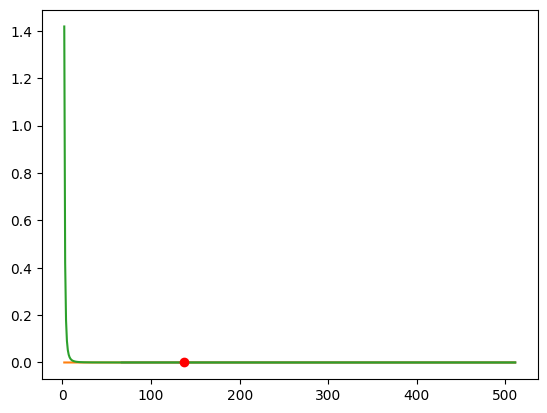

Subtracting  3.4077198616841095e-06  from  9.677058e-06
Processing subtraction for image  8
[512 370]
ignoring:  42
start:  -184
end:  -100
[-184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173 -172 -171
 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159 -158 -157
 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144 -143
 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131 -130 -129
 -128 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115
 -114 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101]


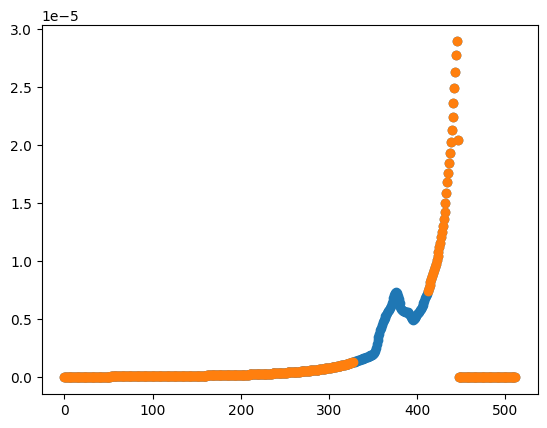

a:  7.379020987862471 b:  -6.476651203495612e-07


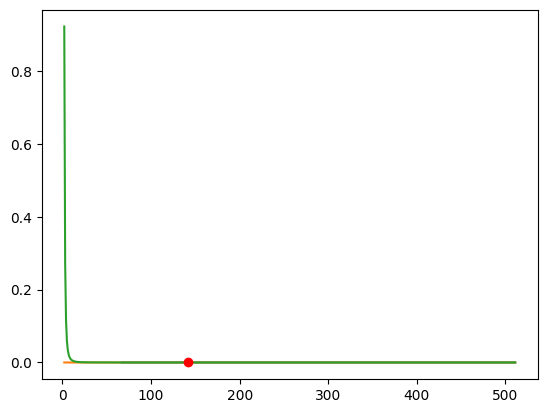

Subtracting  1.9294493675617037e-06  from  6.178926e-06
[512 370]
ignoring:  42
start:  -184
end:  -100
[-184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173 -172 -171
 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159 -158 -157
 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144 -143
 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131 -130 -129
 -128 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115
 -114 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101]


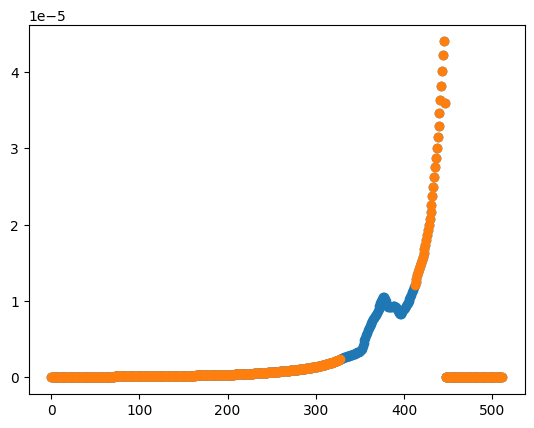

a:  11.544366283471541 b:  -9.825146307915392e-07


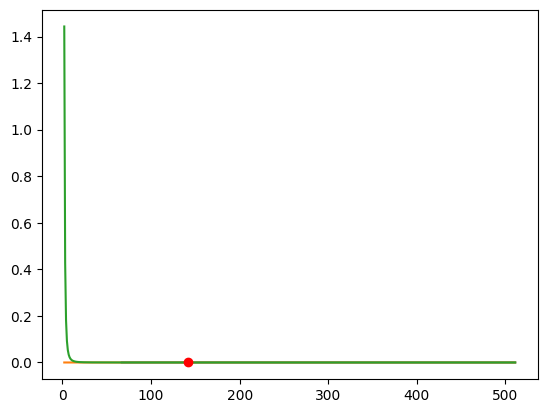

Subtracting  3.049341851501385e-06  from  8.707524e-06
Processing subtraction for image  9
[512 364]
ignoring:  44
start:  -192
end:  -104
[-192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181 -180 -179
 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167 -166 -165
 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152 -151
 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138 -137
 -136 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124 -123
 -122 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111 -110 -109
 -108 -107 -106 -105]


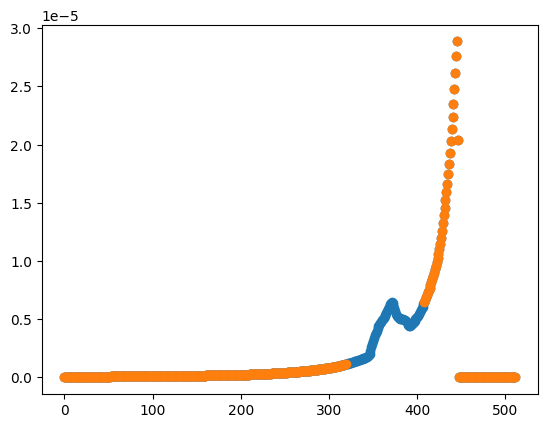

a:  7.465270163712061 b:  -6.384103728137882e-07


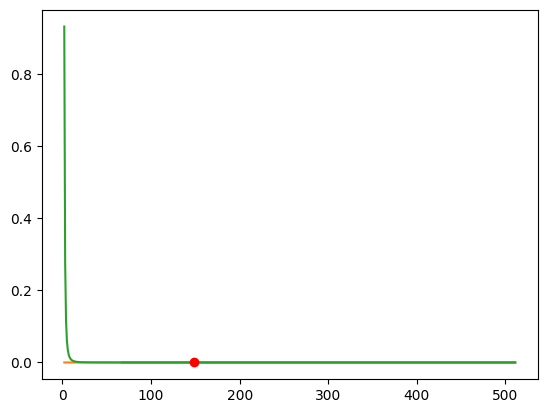

Subtracting  1.664411697112987e-06  from  5.385604e-06
[512 364]
ignoring:  44
start:  -192
end:  -104
[-192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181 -180 -179
 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167 -166 -165
 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152 -151
 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138 -137
 -136 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124 -123
 -122 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111 -110 -109
 -108 -107 -106 -105]


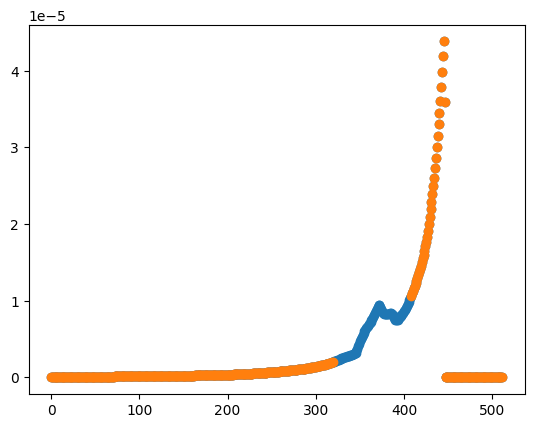

a:  11.668866521999288 b:  -9.658646155335291e-07


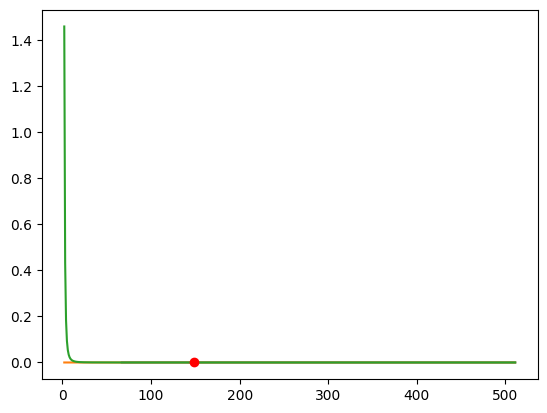

Subtracting  2.6336465566821122e-06  from  7.6286724e-06
Processing subtraction for image  10
[512 359]
ignoring:  45
start:  -198
end:  -108
[-198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187 -186 -185
 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173 -172 -171
 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159 -158 -157
 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144 -143
 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131 -130 -129
 -128 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115
 -114 -113 -112 -111 -110 -109]


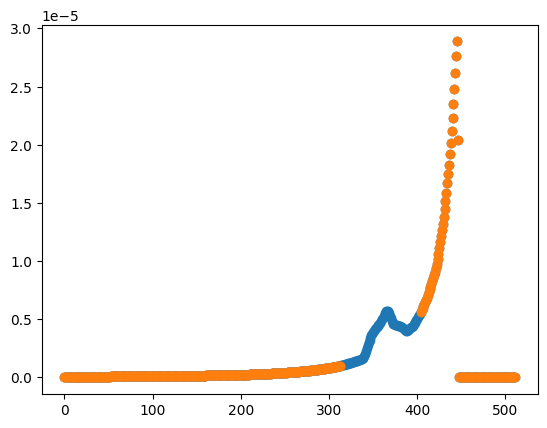

a:  7.525874848469277 b:  -6.178352254361309e-07


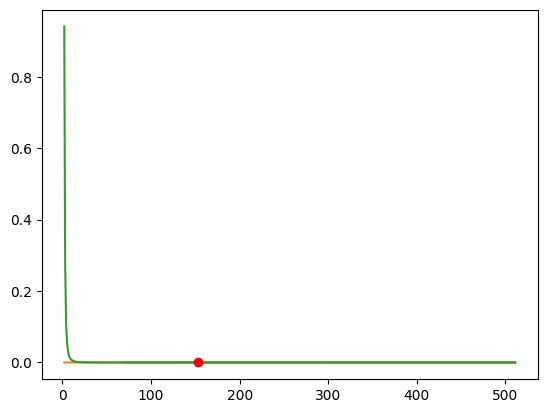

Subtracting  1.4834388358137814e-06  from  4.851869e-06
[512 359]
ignoring:  45
start:  -198
end:  -108
[-198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187 -186 -185
 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173 -172 -171
 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159 -158 -157
 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144 -143
 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131 -130 -129
 -128 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115
 -114 -113 -112 -111 -110 -109]


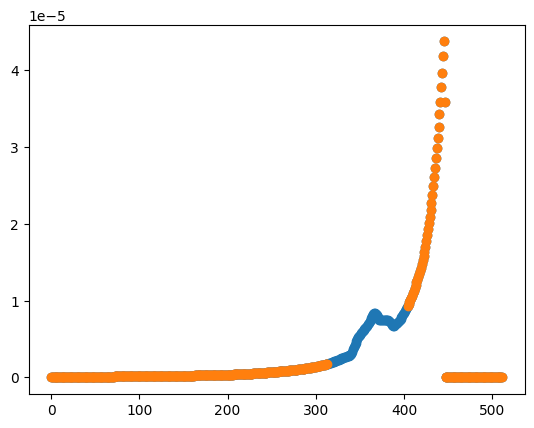

a:  11.75388560505796 b:  -9.298166216313525e-07


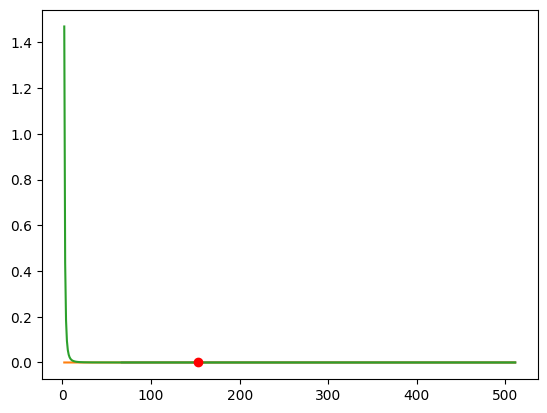

Subtracting  2.351946022326312e-06  from  6.9142416e-06
Processing subtraction for image  11
[512 353]
ignoring:  47
start:  -206
end:  -112
[-206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195 -194 -193
 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181 -180 -179
 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167 -166 -165
 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152 -151
 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138 -137
 -136 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124 -123
 -122 -121 -120 -119 -118 -117 -116 -115 -114 -113]


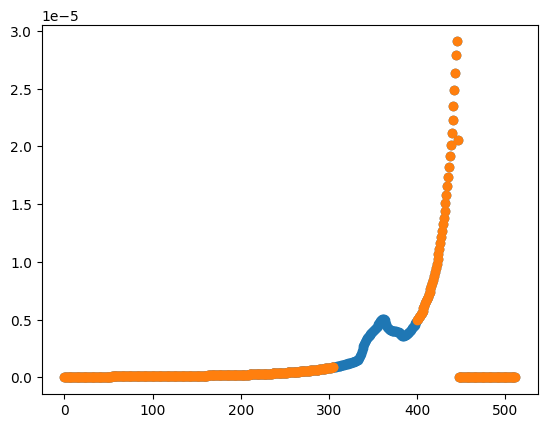

a:  7.58682656888888 b:  -6.075230156181119e-07


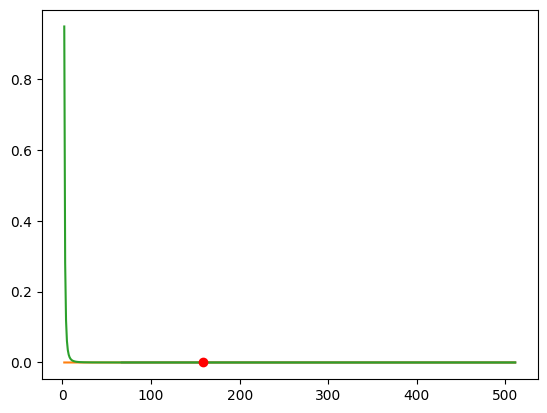

Subtracting  1.2798979871258587e-06  from  4.262257e-06
[512 353]
ignoring:  47
start:  -206
end:  -112
[-206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195 -194 -193
 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181 -180 -179
 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167 -166 -165
 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152 -151
 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138 -137
 -136 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124 -123
 -122 -121 -120 -119 -118 -117 -116 -115 -114 -113]


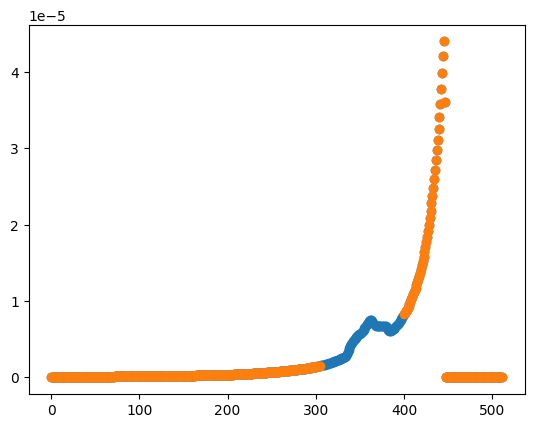

a:  11.83163278910937 b:  -9.085587789810688e-07


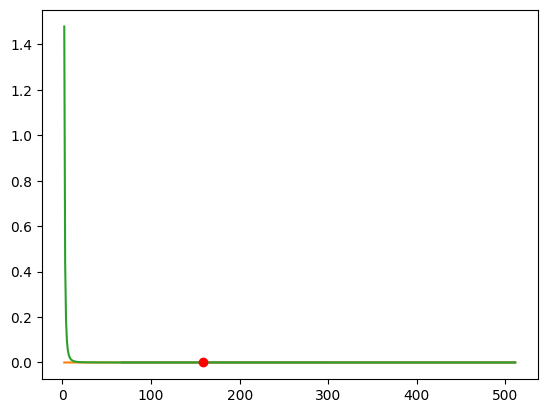

Subtracting  2.0348684919799637e-06  from  6.1183528e-06
Processing subtraction for image  12
[512 348]
ignoring:  49
start:  -213
end:  -115
[-213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202 -201 -200
 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187 -186
 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173 -172
 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159 -158
 -157 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144
 -143 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131 -130
 -129 -128 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116]


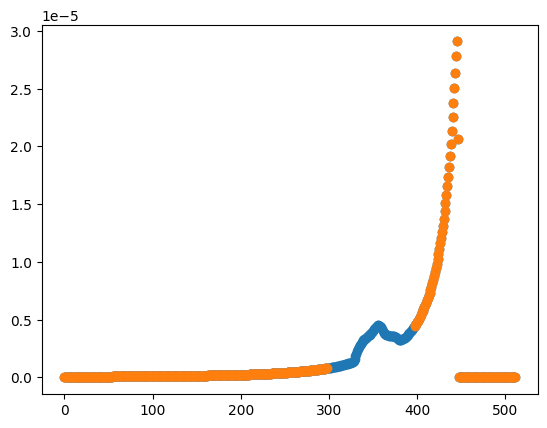

a:  7.629992230468523 b:  -6.042795506583864e-07


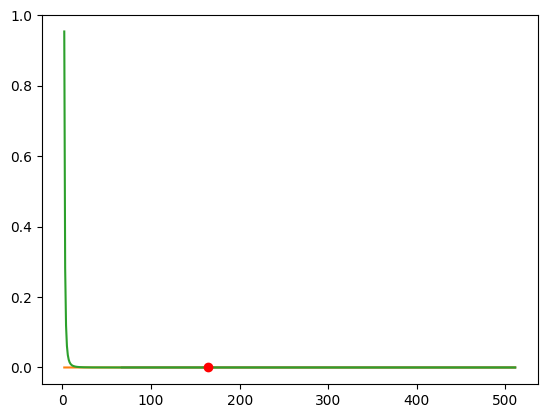

Subtracting  1.1255071413668407e-06  from  3.8544117e-06
[512 348]
ignoring:  49
start:  -213
end:  -115
[-213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202 -201 -200
 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187 -186
 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173 -172
 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159 -158
 -157 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144
 -143 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131 -130
 -129 -128 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116]


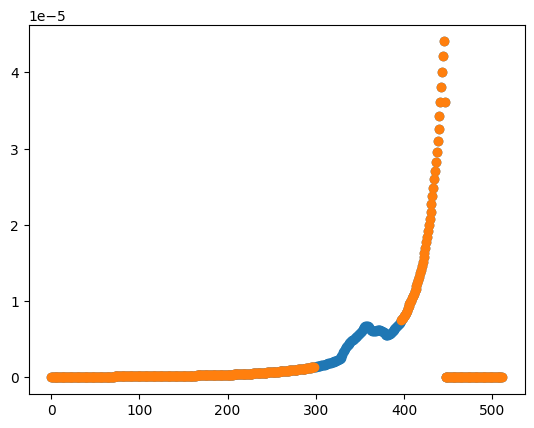

a:  11.884532226653477 b:  -8.996516419156452e-07


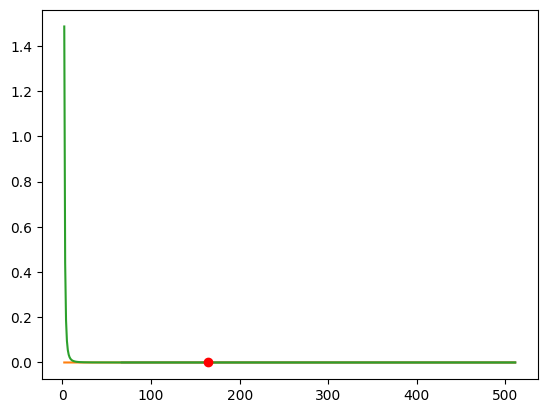

Subtracting  1.794676879746266e-06  from  5.579903e-06
Processing subtraction for image  13
[512 342]
ignoring:  51
start:  -221
end:  -119
[-221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210 -209 -208
 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195 -194
 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181 -180
 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167 -166
 -165 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152
 -151 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138
 -137 -136 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124
 -123 -122 -121 -120]


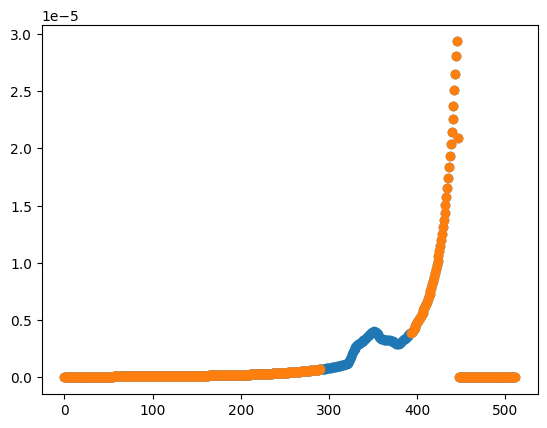

a:  7.681418351828121 b:  -5.93185476955124e-07


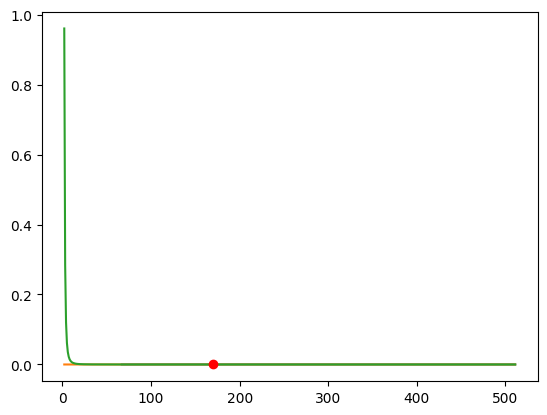

Subtracting  9.703028910131481e-07  from  3.4203351e-06
[512 342]
ignoring:  51
start:  -221
end:  -119
[-221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210 -209 -208
 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195 -194
 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181 -180
 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167 -166
 -165 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152
 -151 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138
 -137 -136 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124
 -123 -122 -121 -120]


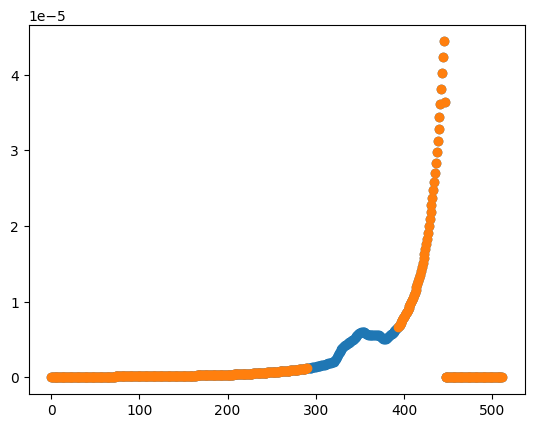

a:  11.953897174306107 b:  -8.778684166519837e-07


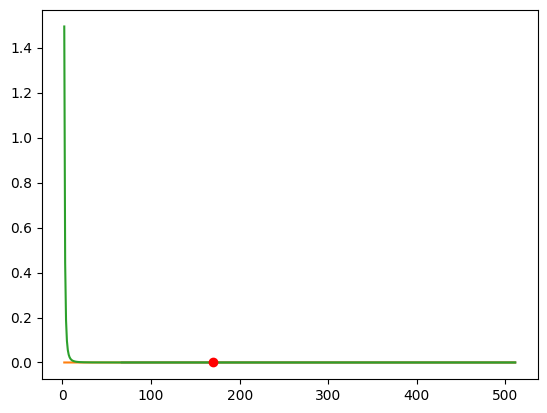

Subtracting  1.5552472304691453e-06  from  5.00056e-06
Processing subtraction for image  14
[512 337]
ignoring:  52
start:  -227
end:  -123
[-227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216 -215 -214
 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202 -201 -200
 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187 -186
 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173 -172
 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159 -158
 -157 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144
 -143 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131 -130
 -129 -128 -127 -126 -125 -124]


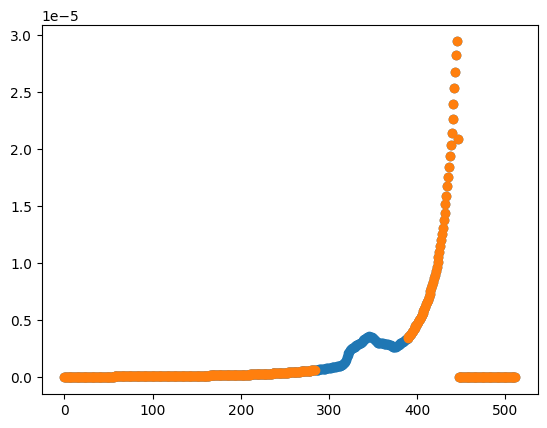

a:  7.736306923312713 b:  -5.778480441969417e-07


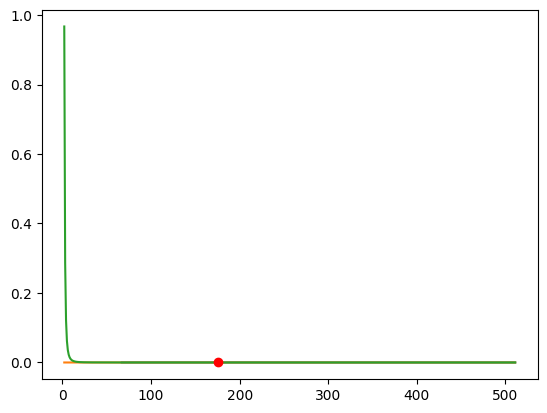

Subtracting  8.656611193366258e-07  from  3.1099469e-06
[512 337]
ignoring:  52
start:  -227
end:  -123
[-227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216 -215 -214
 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202 -201 -200
 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187 -186
 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173 -172
 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159 -158
 -157 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144
 -143 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131 -130
 -129 -128 -127 -126 -125 -124]


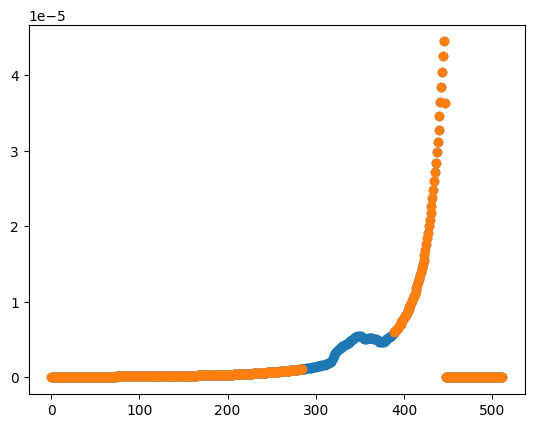

a:  12.027356681930954 b:  -8.486886844127417e-07


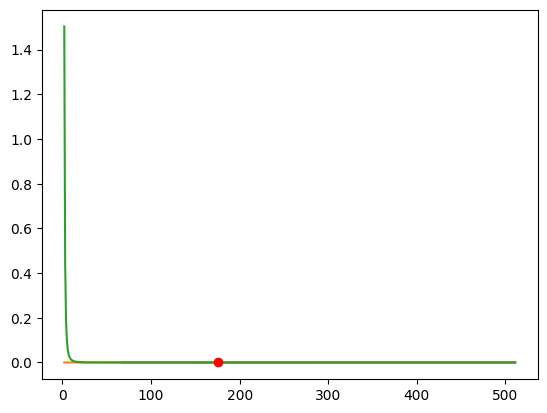

Subtracting  1.3954828247522173e-06  from  4.5963925e-06
Processing subtraction for image  15
[512 331]
ignoring:  54
start:  -235
end:  -127
[-235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224 -223 -222
 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210 -209 -208
 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195 -194
 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181 -180
 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167 -166
 -165 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152
 -151 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138
 -137 -136 -135 -134 -133 -132 -131 -130 -129 -128]


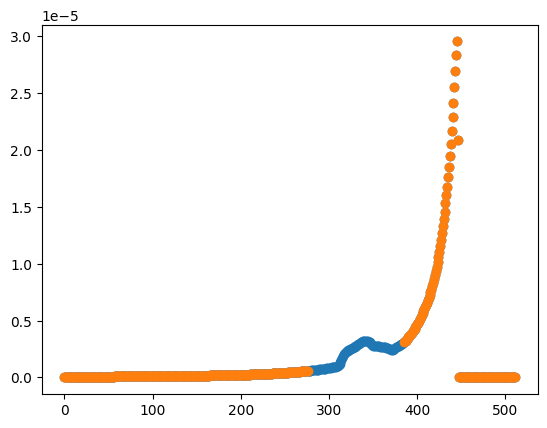

a:  7.791993559274102 b:  -5.689347111116572e-07


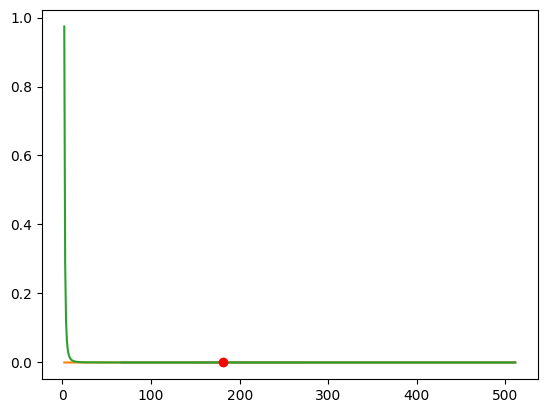

Subtracting  7.451182229497296e-07  from  2.7853187e-06
[512 331]
ignoring:  54
start:  -235
end:  -127
[-235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224 -223 -222
 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210 -209 -208
 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195 -194
 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181 -180
 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167 -166
 -165 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152
 -151 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138
 -137 -136 -135 -134 -133 -132 -131 -130 -129 -128]


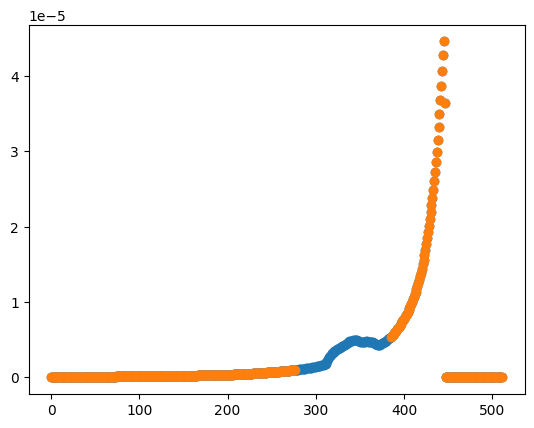

a:  12.09920414265614 b:  -8.290735089765124e-07


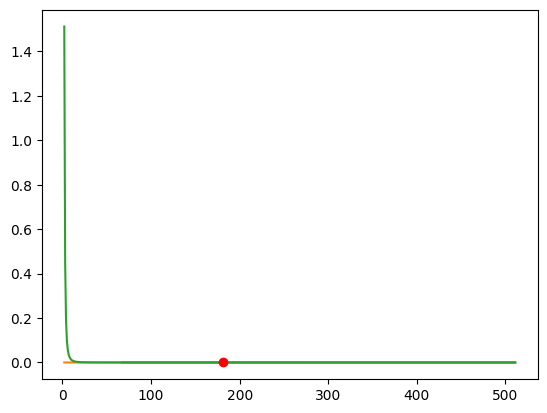

Subtracting  1.211353575892142e-06  from  4.1733206e-06
Processing subtraction for image  16
[512 326]
ignoring:  55
start:  -241
end:  -131
[-241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230 -229 -228
 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216 -215 -214
 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202 -201 -200
 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187 -186
 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173 -172
 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159 -158
 -157 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144
 -143 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132]


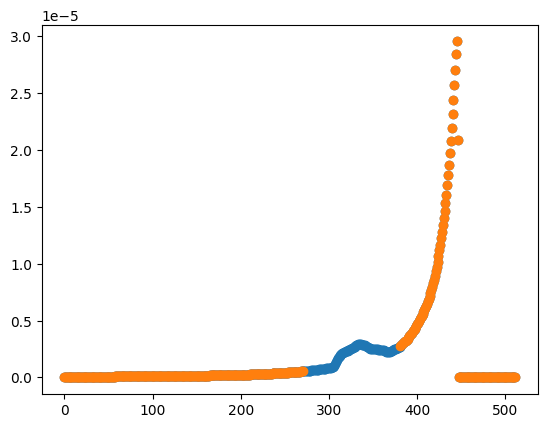

a:  7.8468870657565795 b:  -5.551618183838794e-07


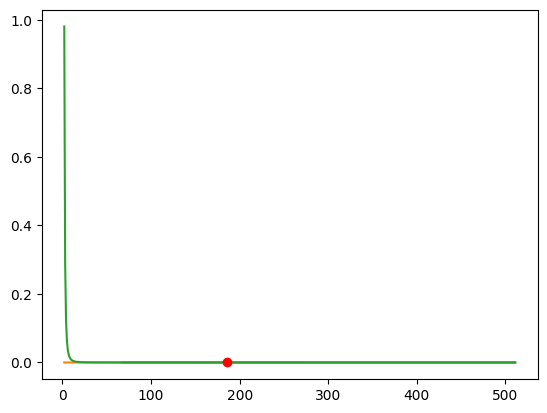

Subtracting  6.642729390926794e-07  from  2.547813e-06
[512 326]
ignoring:  55
start:  -241
end:  -131
[-241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230 -229 -228
 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216 -215 -214
 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202 -201 -200
 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187 -186
 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173 -172
 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159 -158
 -157 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145 -144
 -143 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132]


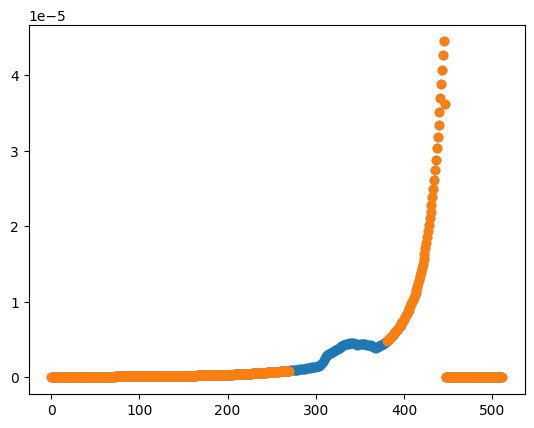

a:  12.166071086606637 b:  -8.010016332729677e-07


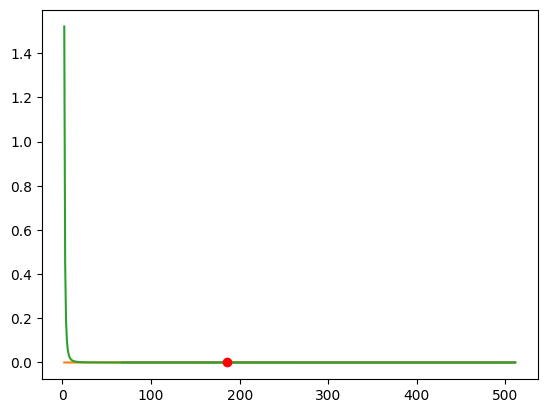

Subtracting  1.0896500124836175e-06  from  3.862066e-06
Processing subtraction for image  17
[512 320]
ignoring:  57
start:  -249
end:  -135
[-249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238 -237 -236
 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224 -223 -222
 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210 -209 -208
 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195 -194
 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181 -180
 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167 -166
 -165 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152
 -151 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138
 -137 -136]


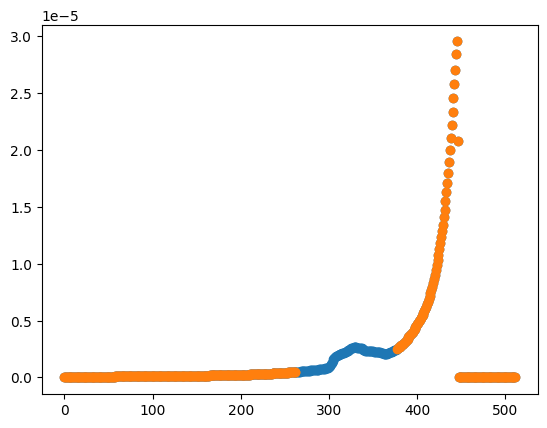

a:  7.898885072408056 b:  -5.451161116523268e-07


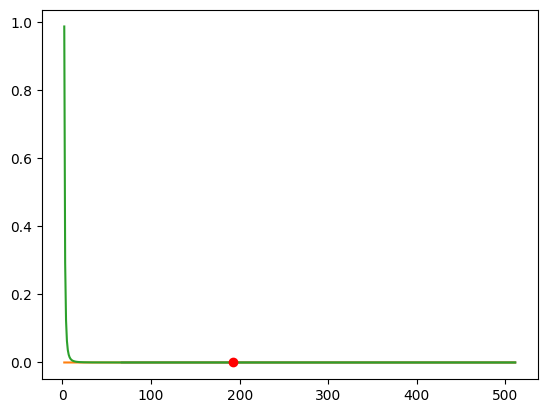

Subtracting  5.708785286143821e-07  from  2.2836887e-06
[512 320]
ignoring:  57
start:  -249
end:  -135
[-249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238 -237 -236
 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224 -223 -222
 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210 -209 -208
 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195 -194
 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181 -180
 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167 -166
 -165 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152
 -151 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138
 -137 -136]


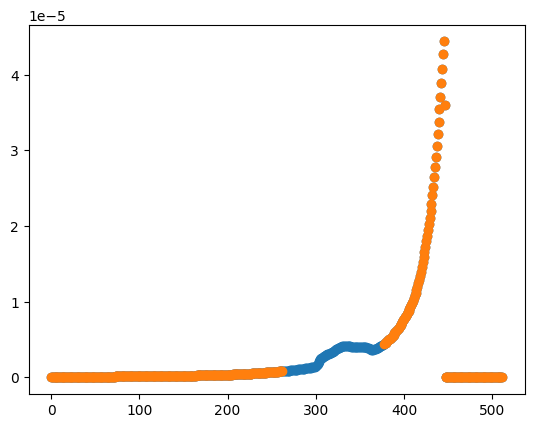

a:  12.22553248263553 b:  -7.784766280480797e-07


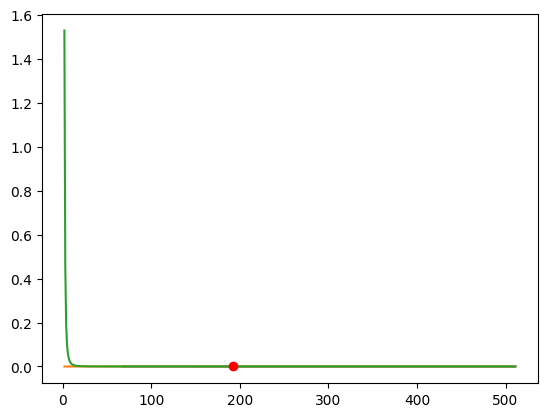

Subtracting  9.488087546304156e-07  from  3.467748e-06
Processing subtraction for image  18
[512 315]
ignoring:  59
start:  -256
end:  -138
[-256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245 -244 -243
 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230 -229
 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216 -215
 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202 -201
 -200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187
 -186 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173
 -172 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159
 -158 -157 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145
 -144 -143 -142 -141 -140 -139]


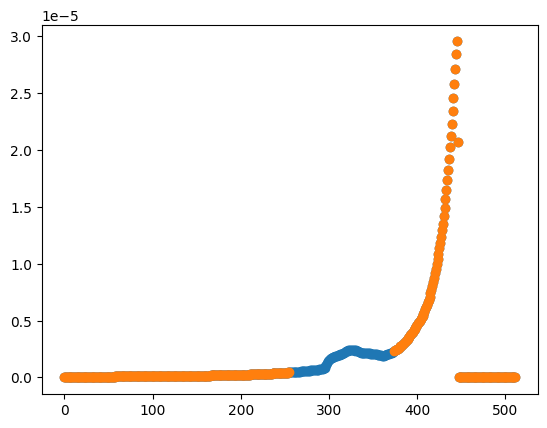

a:  7.952409480894813 b:  -5.410520361629398e-07


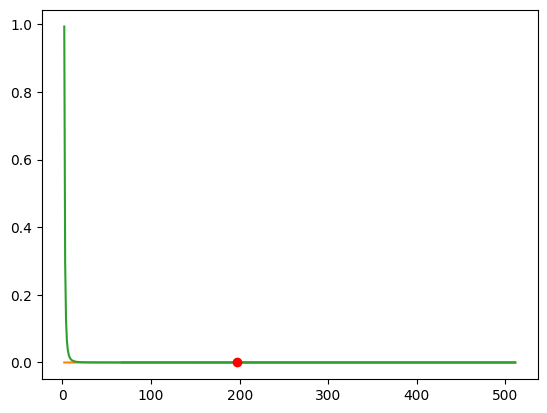

Subtracting  4.991077416392437e-07  from  2.0865805e-06
[512 315]
ignoring:  59
start:  -256
end:  -138
[-256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245 -244 -243
 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230 -229
 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216 -215
 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202 -201
 -200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187
 -186 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173
 -172 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159
 -158 -157 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145
 -144 -143 -142 -141 -140 -139]


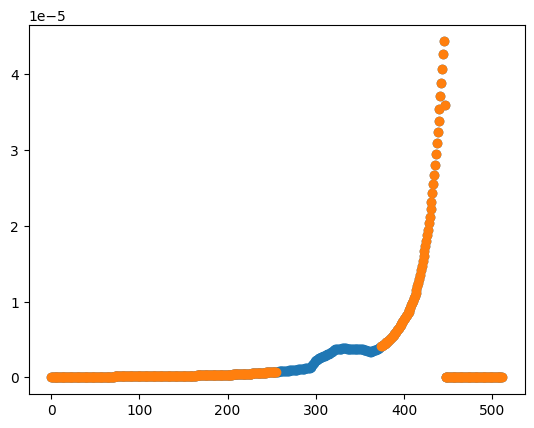

a:  12.280085668163595 b:  -7.653440969448243e-07


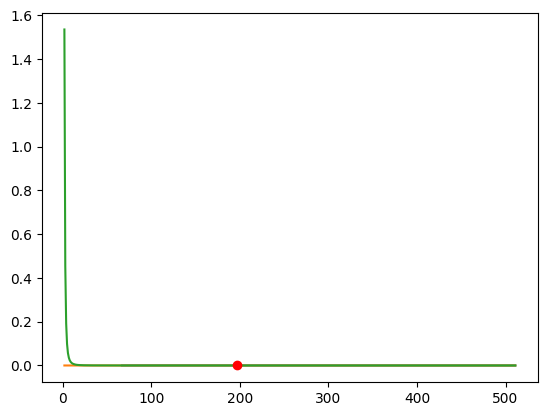

Subtracting  8.408673551535358e-07  from  3.1573288e-06
Processing subtraction for image  19
[512 309]
ignoring:  60
start:  -263
end:  -143
[-263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253 -252 -251 -250
 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238 -237 -236
 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224 -223 -222
 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210 -209 -208
 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195 -194
 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181 -180
 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167 -166
 -165 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152
 -151 -150 -149 -148 -147 -146 -145 -144]


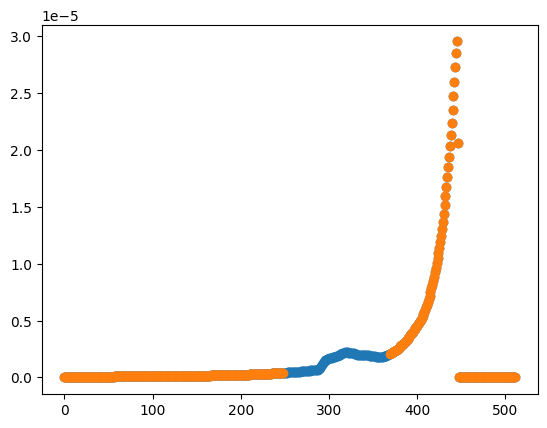

a:  8.012897216550193 b:  -5.21158516142456e-07


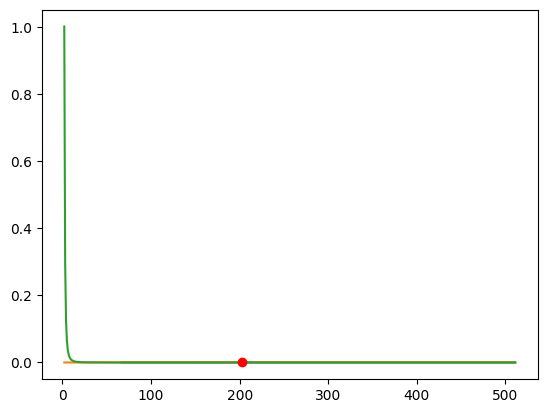

Subtracting  4.367002060184324e-07  from  1.8763219e-06
[512 309]
ignoring:  60
start:  -263
end:  -143
[-263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253 -252 -251 -250
 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238 -237 -236
 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224 -223 -222
 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210 -209 -208
 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195 -194
 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181 -180
 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167 -166
 -165 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152
 -151 -150 -149 -148 -147 -146 -145 -144]


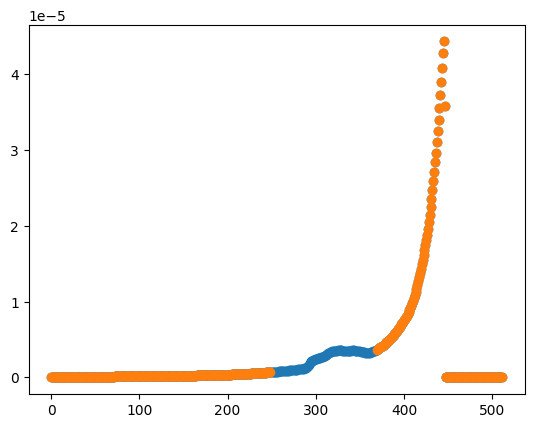

a:  12.337716548705718 b:  -7.240131280917896e-07


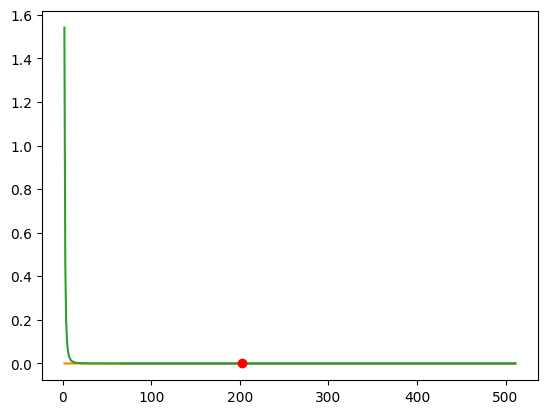

Subtracting  7.508328718441034e-07  from  2.8148443e-06
Processing subtraction for image  20
[512 304]
ignoring:  62
start:  -270
end:  -146
[-270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259 -258 -257
 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245 -244 -243
 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230 -229
 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216 -215
 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202 -201
 -200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187
 -186 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173
 -172 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159
 -158 -157 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147]


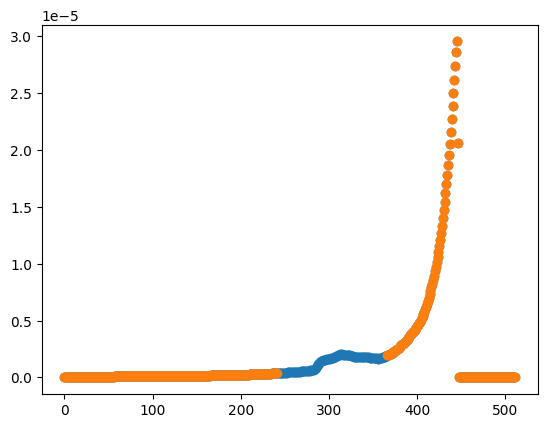

a:  8.079720005458997 b:  -5.167471073984435e-07


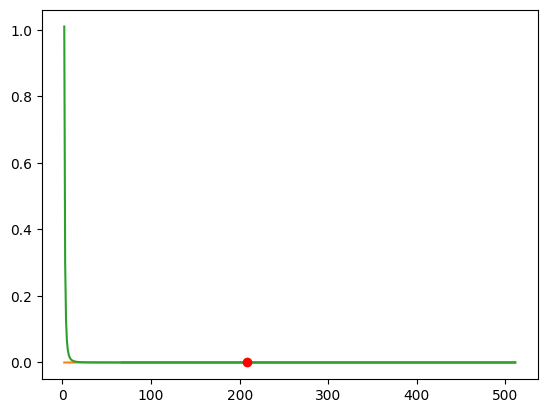

Subtracting  3.811081005932556e-07  from  1.7216241e-06
[512 304]
ignoring:  62
start:  -270
end:  -146
[-270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259 -258 -257
 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245 -244 -243
 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230 -229
 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216 -215
 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202 -201
 -200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187
 -186 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173
 -172 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159
 -158 -157 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147]


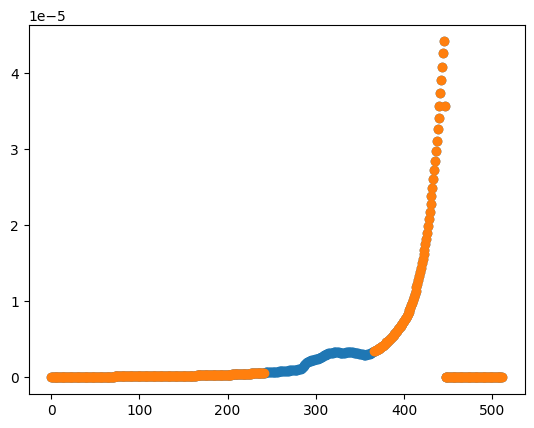

a:  12.399696133332831 b:  -7.082553356353273e-07


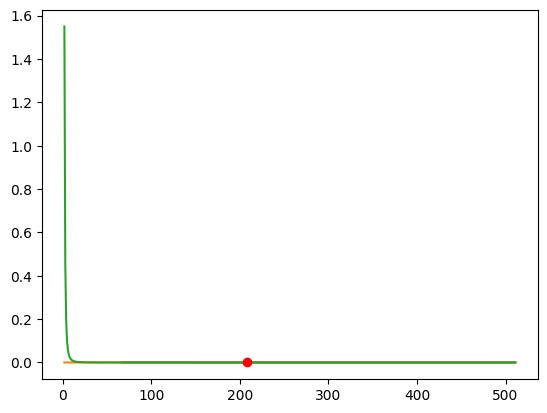

Subtracting  6.696552532595114e-07  from  2.5686854e-06
Processing subtraction for image  21
[512 298]
ignoring:  64
start:  -278
end:  -150
[-278 -277 -276 -275 -274 -273 -272 -271 -270 -269 -268 -267 -266 -265
 -264 -263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253 -252 -251
 -250 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238 -237
 -236 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224 -223
 -222 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210 -209
 -208 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195
 -194 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181
 -180 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167
 -166 -165 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153
 -152 -151]


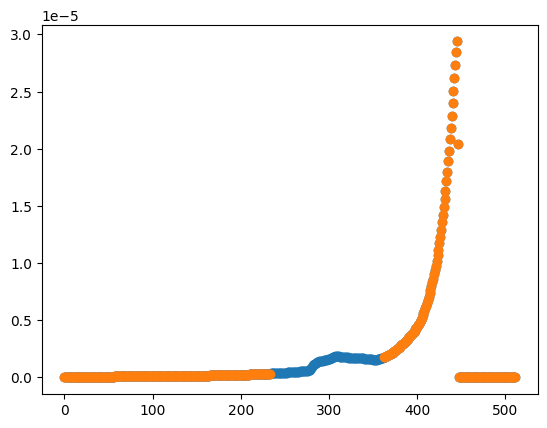

a:  8.140587988978284 b:  -5.025881812961612e-07


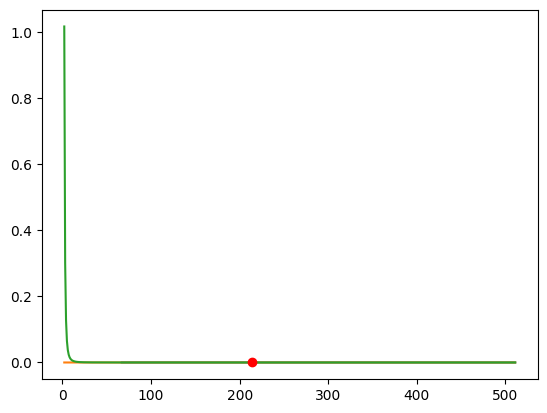

Subtracting  3.2805490520960675e-07  from  1.5615612e-06
[512 298]
ignoring:  64
start:  -278
end:  -150
[-278 -277 -276 -275 -274 -273 -272 -271 -270 -269 -268 -267 -266 -265
 -264 -263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253 -252 -251
 -250 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238 -237
 -236 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224 -223
 -222 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210 -209
 -208 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195
 -194 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181
 -180 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167
 -166 -165 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153
 -152 -151]


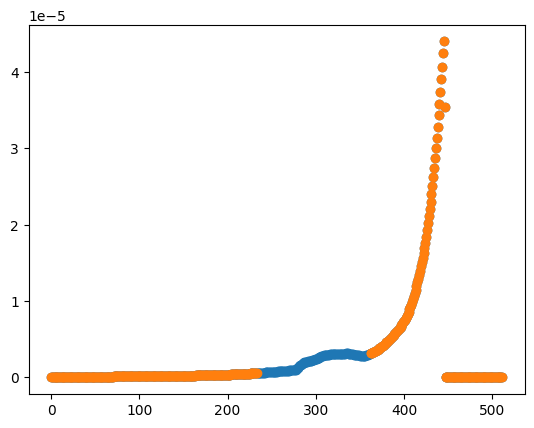

a:  12.452901867589448 b:  -6.765706104027051e-07


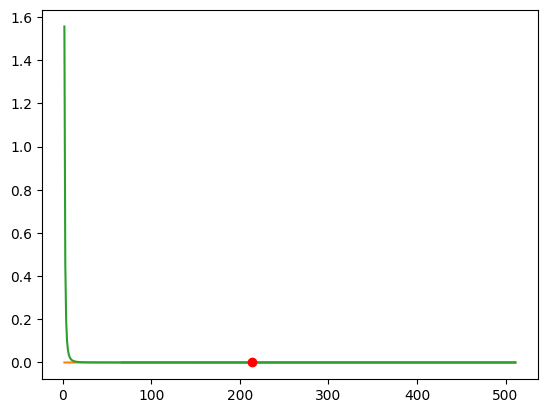

Subtracting  5.94089059052719e-07  from  2.3169787e-06
Processing subtraction for image  22
[512 293]
ignoring:  65
start:  -284
end:  -154
[-284 -283 -282 -281 -280 -279 -278 -277 -276 -275 -274 -273 -272 -271
 -270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259 -258 -257
 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245 -244 -243
 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230 -229
 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216 -215
 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202 -201
 -200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187
 -186 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173
 -172 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159
 -158 -157 -156 -155]


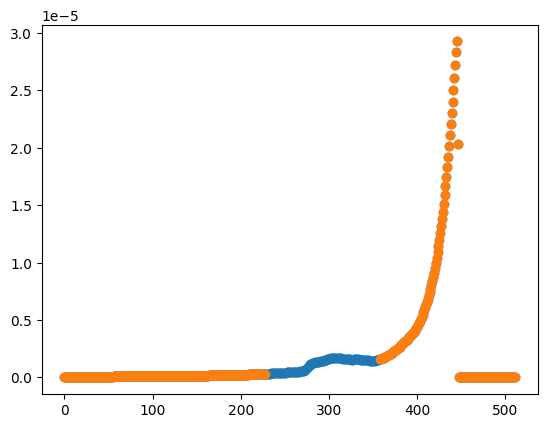

a:  8.187509005159558 b:  -4.824531307500269e-07


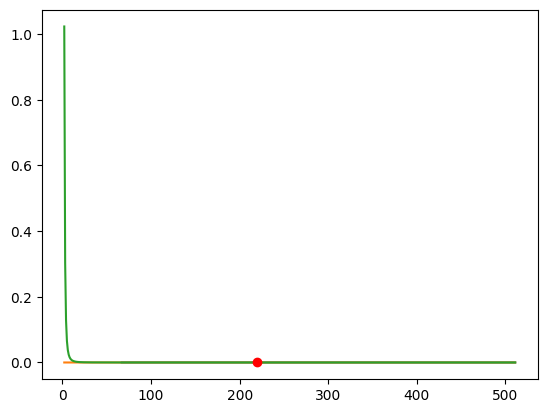

Subtracting  2.9705284010772185e-07  from  1.4424538e-06
[512 293]
ignoring:  65
start:  -284
end:  -154
[-284 -283 -282 -281 -280 -279 -278 -277 -276 -275 -274 -273 -272 -271
 -270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259 -258 -257
 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245 -244 -243
 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230 -229
 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216 -215
 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202 -201
 -200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187
 -186 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173
 -172 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159
 -158 -157 -156 -155]


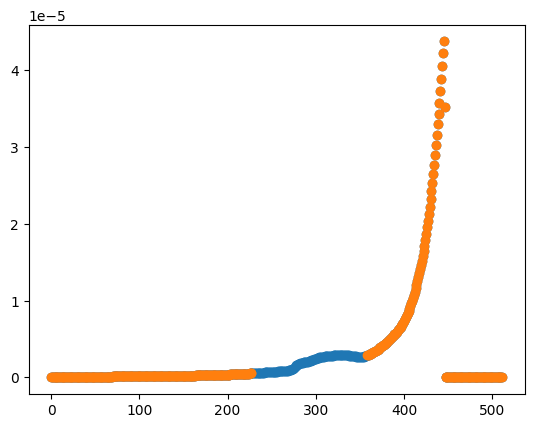

a:  12.488834602008115 b:  -6.373632424164798e-07


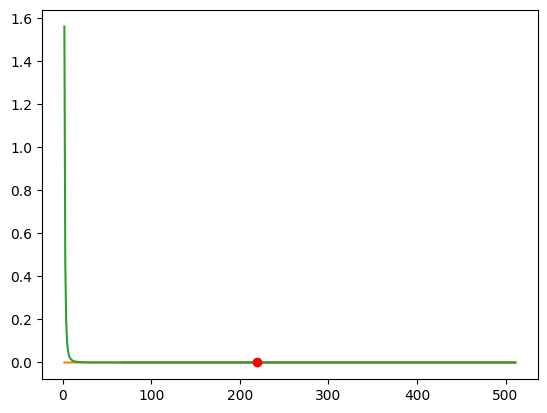

Subtracting  5.516578792928652e-07  from  2.1387589e-06
Processing subtraction for image  23
[512 287]
ignoring:  67
start:  -292
end:  -158
[-292 -291 -290 -289 -288 -287 -286 -285 -284 -283 -282 -281 -280 -279
 -278 -277 -276 -275 -274 -273 -272 -271 -270 -269 -268 -267 -266 -265
 -264 -263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253 -252 -251
 -250 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238 -237
 -236 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224 -223
 -222 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210 -209
 -208 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195
 -194 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181
 -180 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167
 -166 -165 -164 -163 -162 -161 -160 -159]


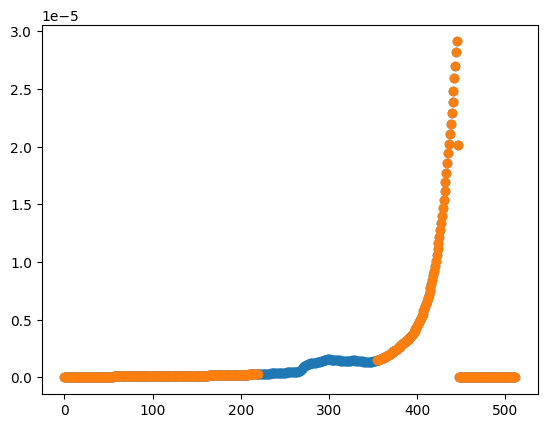

a:  8.223278443415994 b:  -4.5889404807056597e-07


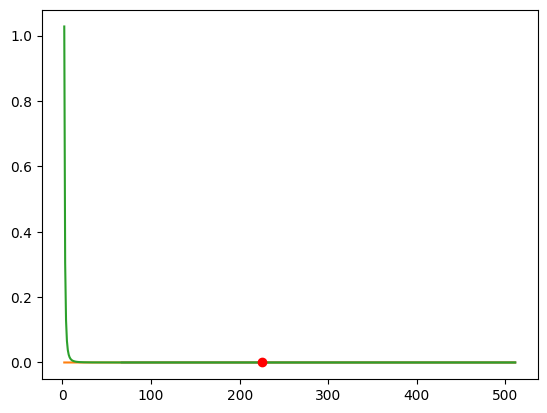

Subtracting  2.630398619138286e-07  from  1.3215339e-06
[512 287]
ignoring:  67
start:  -292
end:  -158
[-292 -291 -290 -289 -288 -287 -286 -285 -284 -283 -282 -281 -280 -279
 -278 -277 -276 -275 -274 -273 -272 -271 -270 -269 -268 -267 -266 -265
 -264 -263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253 -252 -251
 -250 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238 -237
 -236 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224 -223
 -222 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210 -209
 -208 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195
 -194 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181
 -180 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167
 -166 -165 -164 -163 -162 -161 -160 -159]


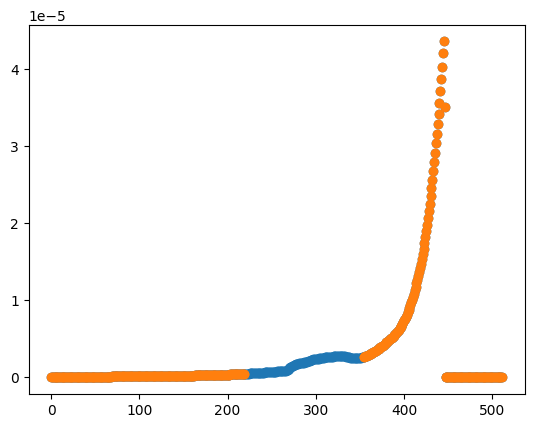

a:  12.51069558741897 b:  -5.937624751864589e-07


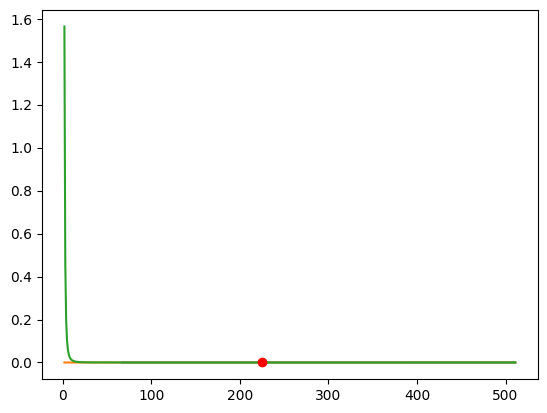

Subtracting  5.045701964113657e-07  from  1.9551555e-06
Processing subtraction for image  24
[512 282]
ignoring:  69
start:  -299
end:  -161
[-299 -298 -297 -296 -295 -294 -293 -292 -291 -290 -289 -288 -287 -286
 -285 -284 -283 -282 -281 -280 -279 -278 -277 -276 -275 -274 -273 -272
 -271 -270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259 -258
 -257 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245 -244
 -243 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230
 -229 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216
 -215 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202
 -201 -200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188
 -187 -186 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174
 -173 -172 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162]


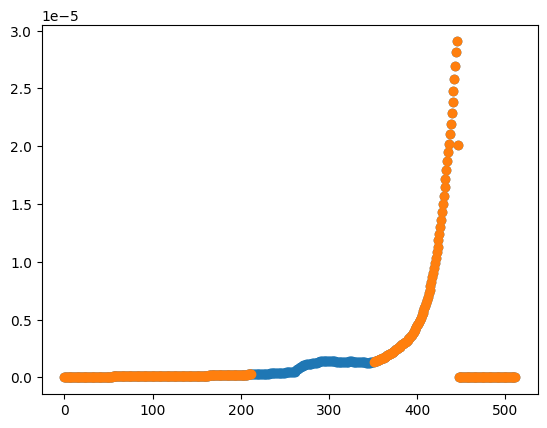

a:  8.251334174677297 b:  -4.370524160113517e-07


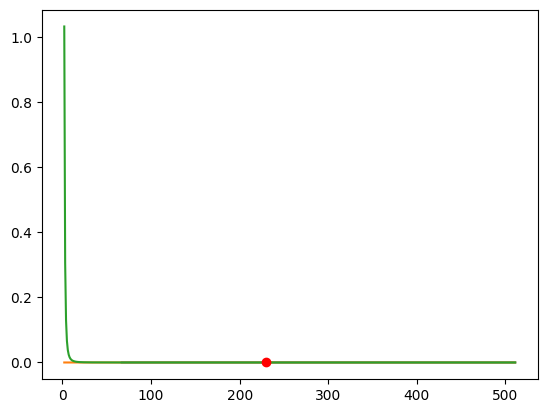

Subtracting  2.4112085387253886e-07  from  1.2284027e-06
[512 282]
ignoring:  69
start:  -299
end:  -161
[-299 -298 -297 -296 -295 -294 -293 -292 -291 -290 -289 -288 -287 -286
 -285 -284 -283 -282 -281 -280 -279 -278 -277 -276 -275 -274 -273 -272
 -271 -270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259 -258
 -257 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245 -244
 -243 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230
 -229 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216
 -215 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202
 -201 -200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188
 -187 -186 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174
 -173 -172 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162]


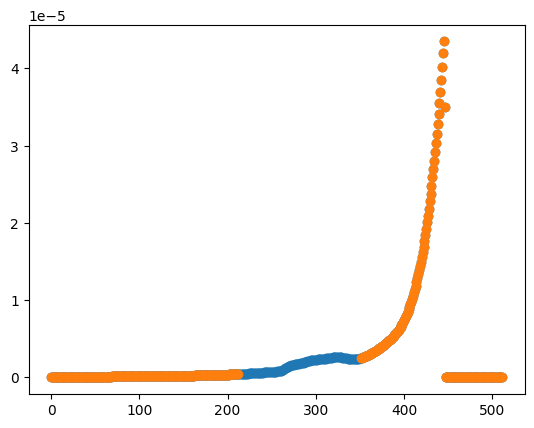

a:  12.52447382919701 b:  -5.550300499208271e-07


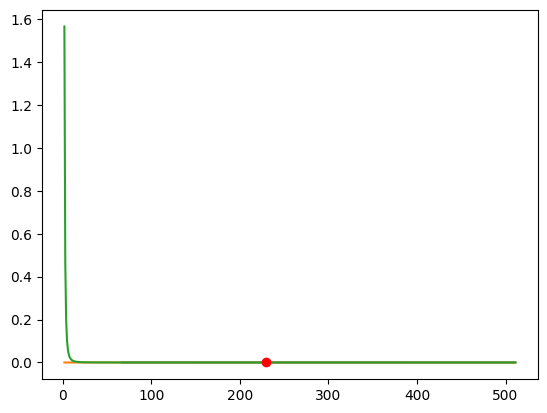

Subtracting  4.7435055575000465e-07  from  1.8175718e-06
Processing subtraction for image  25
[512 276]
ignoring:  70
start:  -306
end:  -166
[-306 -305 -304 -303 -302 -301 -300 -299 -298 -297 -296 -295 -294 -293
 -292 -291 -290 -289 -288 -287 -286 -285 -284 -283 -282 -281 -280 -279
 -278 -277 -276 -275 -274 -273 -272 -271 -270 -269 -268 -267 -266 -265
 -264 -263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253 -252 -251
 -250 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238 -237
 -236 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224 -223
 -222 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210 -209
 -208 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195
 -194 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181
 -180 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167]


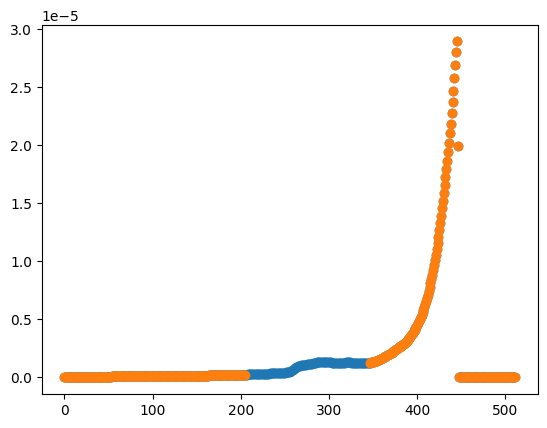

a:  8.269074604782194 b:  -3.996130966859159e-07


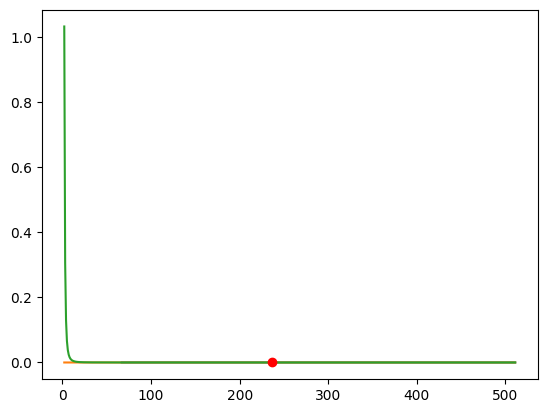

Subtracting  2.294886649339273e-07  from  1.1315099e-06
[512 276]
ignoring:  70
start:  -306
end:  -166
[-306 -305 -304 -303 -302 -301 -300 -299 -298 -297 -296 -295 -294 -293
 -292 -291 -290 -289 -288 -287 -286 -285 -284 -283 -282 -281 -280 -279
 -278 -277 -276 -275 -274 -273 -272 -271 -270 -269 -268 -267 -266 -265
 -264 -263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253 -252 -251
 -250 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238 -237
 -236 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224 -223
 -222 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210 -209
 -208 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195
 -194 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181
 -180 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167]


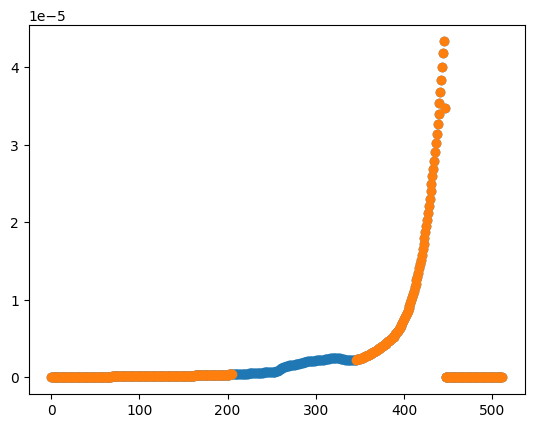

a:  12.524607230421262 b:  -4.913847887013702e-07


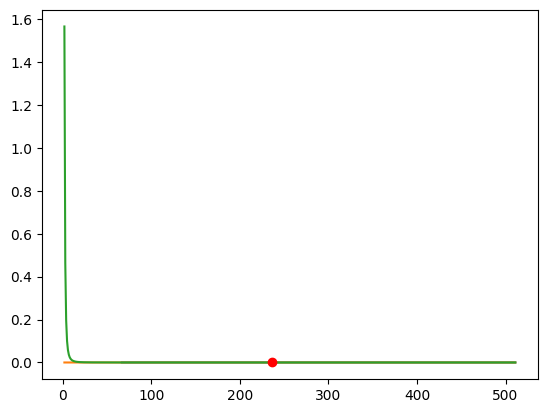

Subtracting  4.614730398757103e-07  from  1.6713622e-06
Processing subtraction for image  26
[512 271]
ignoring:  72
start:  -313
end:  -169
[-313 -312 -311 -310 -309 -308 -307 -306 -305 -304 -303 -302 -301 -300
 -299 -298 -297 -296 -295 -294 -293 -292 -291 -290 -289 -288 -287 -286
 -285 -284 -283 -282 -281 -280 -279 -278 -277 -276 -275 -274 -273 -272
 -271 -270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259 -258
 -257 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245 -244
 -243 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230
 -229 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216
 -215 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202
 -201 -200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188
 -187 -186 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174
 -173 -172 -171 -170]


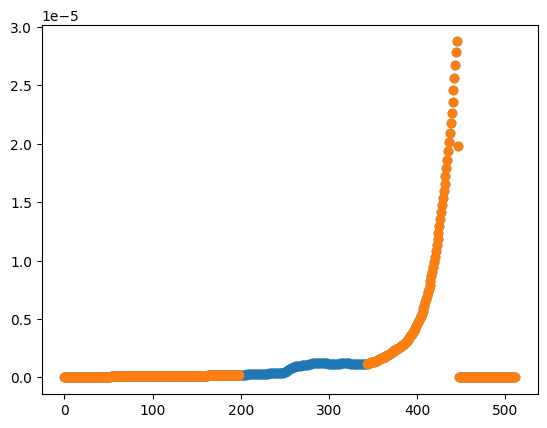

a:  8.278526345591192 b:  -3.679263426942998e-07


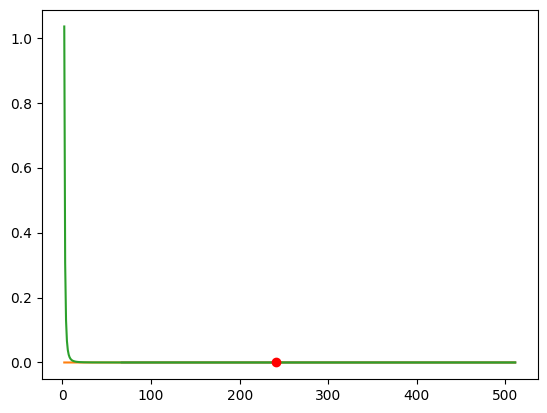

Subtracting  2.235016927121977e-07  from  1.0547359e-06
[512 271]
ignoring:  72
start:  -313
end:  -169
[-313 -312 -311 -310 -309 -308 -307 -306 -305 -304 -303 -302 -301 -300
 -299 -298 -297 -296 -295 -294 -293 -292 -291 -290 -289 -288 -287 -286
 -285 -284 -283 -282 -281 -280 -279 -278 -277 -276 -275 -274 -273 -272
 -271 -270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259 -258
 -257 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245 -244
 -243 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230
 -229 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216
 -215 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202
 -201 -200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188
 -187 -186 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174
 -173 -172 -171 -170]


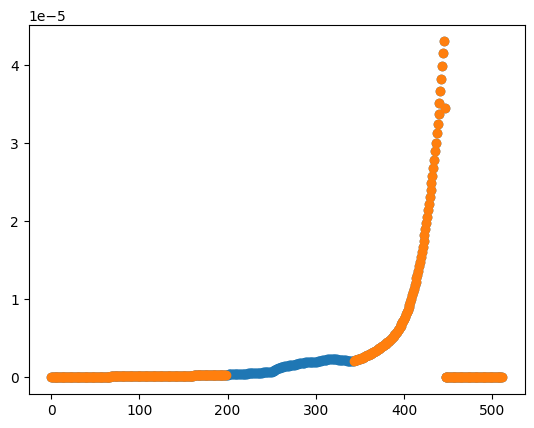

a:  12.517092521863917 b:  -4.3945946401558414e-07


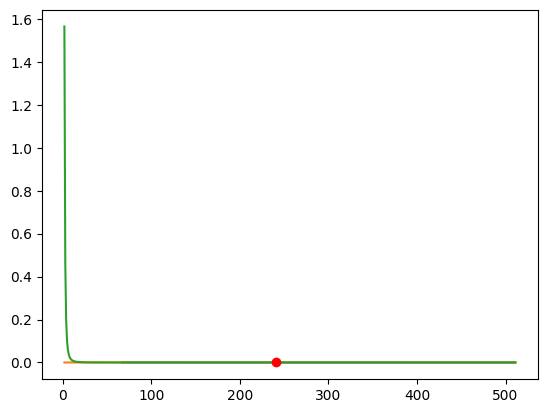

Subtracting  4.547769169738723e-07  from  1.5598571e-06
Processing subtraction for image  27
[512 265]
ignoring:  74
start:  -321
end:  -173
[-321 -320 -319 -318 -317 -316 -315 -314 -313 -312 -311 -310 -309 -308
 -307 -306 -305 -304 -303 -302 -301 -300 -299 -298 -297 -296 -295 -294
 -293 -292 -291 -290 -289 -288 -287 -286 -285 -284 -283 -282 -281 -280
 -279 -278 -277 -276 -275 -274 -273 -272 -271 -270 -269 -268 -267 -266
 -265 -264 -263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253 -252
 -251 -250 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238
 -237 -236 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224
 -223 -222 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210
 -209 -208 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196
 -195 -194 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182
 -181 -180 -179 -178 -177 -176 -175 -174]


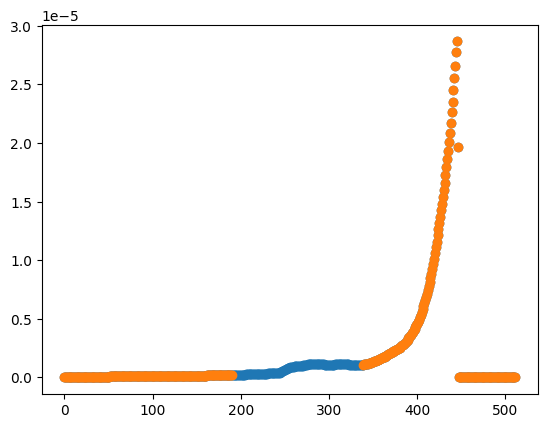

a:  8.273870662517039 b:  -3.2305332600799527e-07


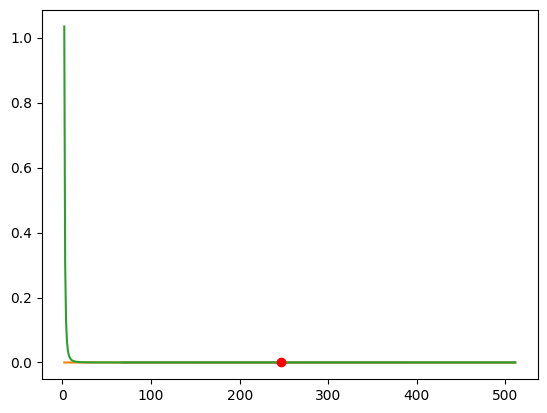

Subtracting  2.260042241070332e-07  from  9.766879e-07
[512 265]
ignoring:  74
start:  -321
end:  -173
[-321 -320 -319 -318 -317 -316 -315 -314 -313 -312 -311 -310 -309 -308
 -307 -306 -305 -304 -303 -302 -301 -300 -299 -298 -297 -296 -295 -294
 -293 -292 -291 -290 -289 -288 -287 -286 -285 -284 -283 -282 -281 -280
 -279 -278 -277 -276 -275 -274 -273 -272 -271 -270 -269 -268 -267 -266
 -265 -264 -263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253 -252
 -251 -250 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238
 -237 -236 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224
 -223 -222 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210
 -209 -208 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196
 -195 -194 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182
 -181 -180 -179 -178 -177 -176 -175 -174]


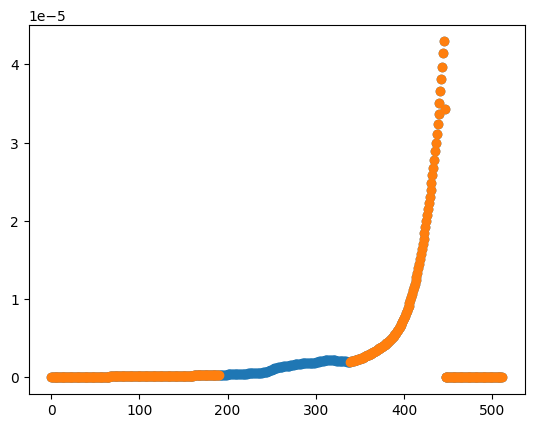

a:  12.492423923284377 b:  -3.673496593505714e-07


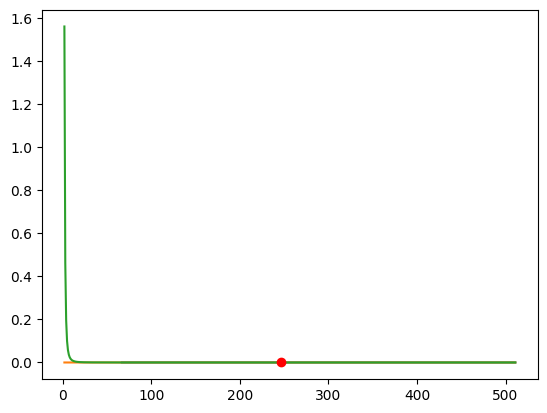

Subtracting  4.6165286608052597e-07  from  1.4433421e-06
Processing subtraction for image  28
[512 260]
ignoring:  75
start:  -327
end:  -177
[-327 -326 -325 -324 -323 -322 -321 -320 -319 -318 -317 -316 -315 -314
 -313 -312 -311 -310 -309 -308 -307 -306 -305 -304 -303 -302 -301 -300
 -299 -298 -297 -296 -295 -294 -293 -292 -291 -290 -289 -288 -287 -286
 -285 -284 -283 -282 -281 -280 -279 -278 -277 -276 -275 -274 -273 -272
 -271 -270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259 -258
 -257 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245 -244
 -243 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230
 -229 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216
 -215 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202
 -201 -200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188
 -187 -186 -185 -184 -183 -182 -181 -180 -179 -178]


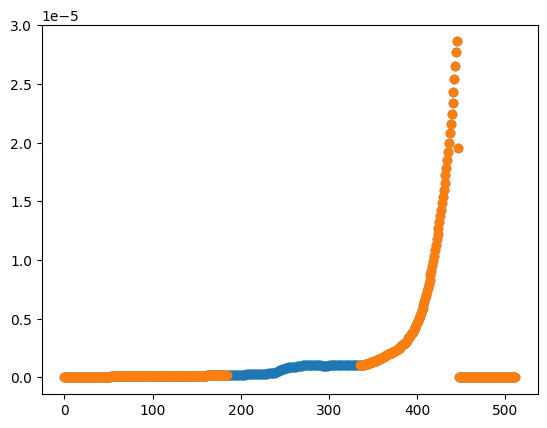

a:  8.266475751071944 b:  -2.790660312136956e-07


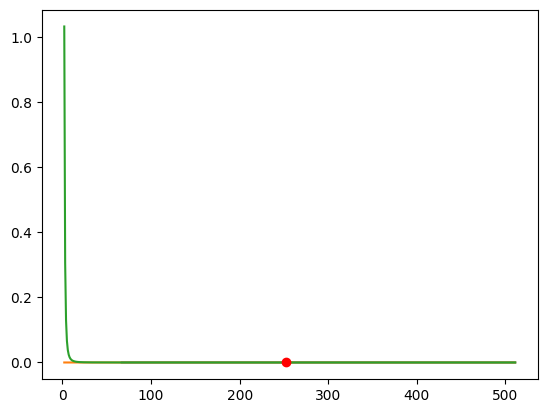

Subtracting  2.3749159039543838e-07  from  9.131905e-07
[512 260]
ignoring:  75
start:  -327
end:  -177
[-327 -326 -325 -324 -323 -322 -321 -320 -319 -318 -317 -316 -315 -314
 -313 -312 -311 -310 -309 -308 -307 -306 -305 -304 -303 -302 -301 -300
 -299 -298 -297 -296 -295 -294 -293 -292 -291 -290 -289 -288 -287 -286
 -285 -284 -283 -282 -281 -280 -279 -278 -277 -276 -275 -274 -273 -272
 -271 -270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259 -258
 -257 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245 -244
 -243 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230
 -229 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216
 -215 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202
 -201 -200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188
 -187 -186 -185 -184 -183 -182 -181 -180 -179 -178]


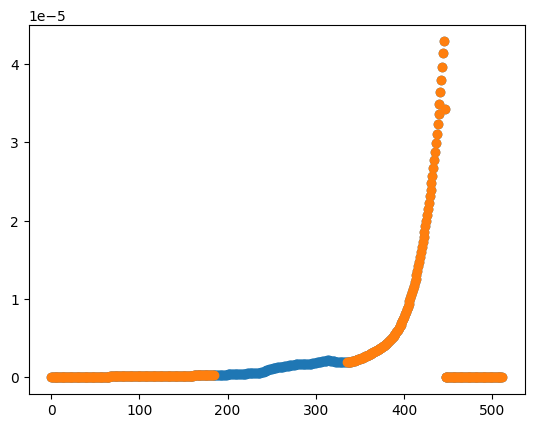

a:  12.466135377268323 b:  -2.981375411642751e-07


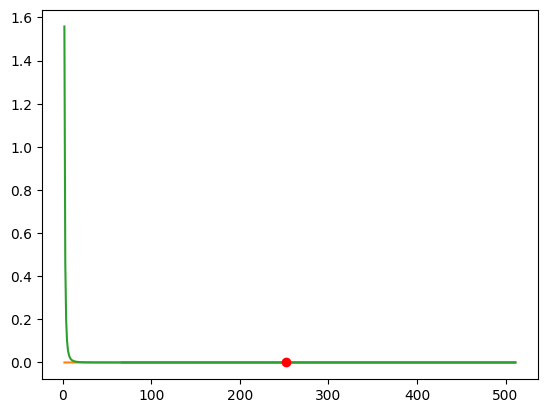

Subtracting  4.808494703568292e-07  from  1.3525305e-06
Processing subtraction for image  29
[512 254]
ignoring:  77
start:  -335
end:  -181
[-335 -334 -333 -332 -331 -330 -329 -328 -327 -326 -325 -324 -323 -322
 -321 -320 -319 -318 -317 -316 -315 -314 -313 -312 -311 -310 -309 -308
 -307 -306 -305 -304 -303 -302 -301 -300 -299 -298 -297 -296 -295 -294
 -293 -292 -291 -290 -289 -288 -287 -286 -285 -284 -283 -282 -281 -280
 -279 -278 -277 -276 -275 -274 -273 -272 -271 -270 -269 -268 -267 -266
 -265 -264 -263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253 -252
 -251 -250 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238
 -237 -236 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224
 -223 -222 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210
 -209 -208 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196
 -195 -194 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182]


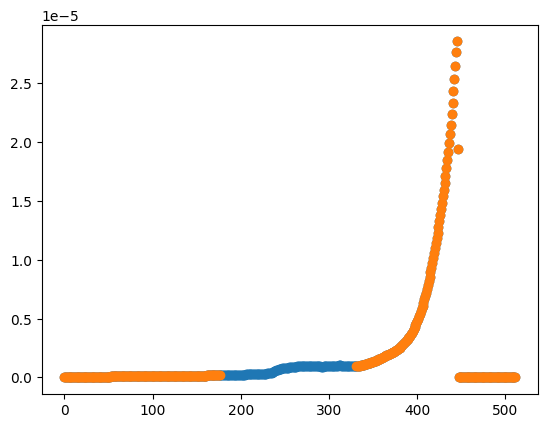

a:  8.249745540862937 b:  -2.2271211795716676e-07


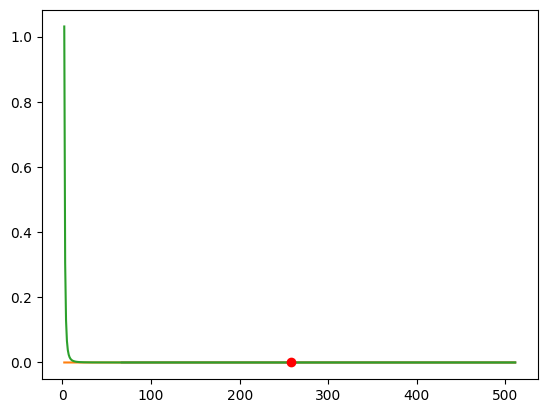

Subtracting  2.5766402996545604e-07  from  8.4643733e-07
[512 254]
ignoring:  77
start:  -335
end:  -181
[-335 -334 -333 -332 -331 -330 -329 -328 -327 -326 -325 -324 -323 -322
 -321 -320 -319 -318 -317 -316 -315 -314 -313 -312 -311 -310 -309 -308
 -307 -306 -305 -304 -303 -302 -301 -300 -299 -298 -297 -296 -295 -294
 -293 -292 -291 -290 -289 -288 -287 -286 -285 -284 -283 -282 -281 -280
 -279 -278 -277 -276 -275 -274 -273 -272 -271 -270 -269 -268 -267 -266
 -265 -264 -263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253 -252
 -251 -250 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238
 -237 -236 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224
 -223 -222 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210
 -209 -208 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196
 -195 -194 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182]


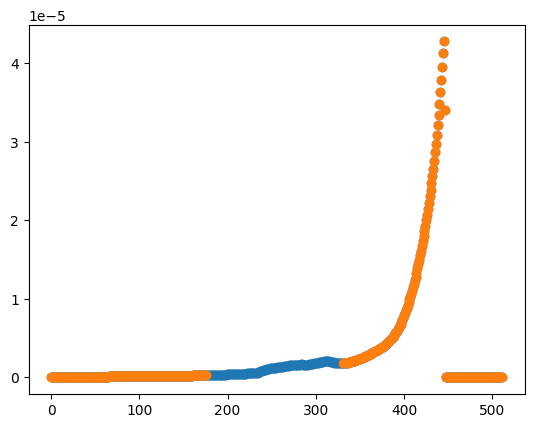

a:  12.425019303187018 b:  -2.0920726641575113e-07


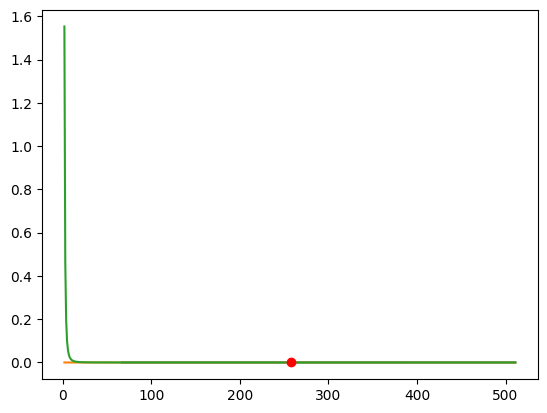

Subtracting  5.142917653016412e-07  from  1.2545752e-06
Processing subtraction for image  30
[512 249]
ignoring:  78
start:  -341
end:  -185
[-341 -340 -339 -338 -337 -336 -335 -334 -333 -332 -331 -330 -329 -328
 -327 -326 -325 -324 -323 -322 -321 -320 -319 -318 -317 -316 -315 -314
 -313 -312 -311 -310 -309 -308 -307 -306 -305 -304 -303 -302 -301 -300
 -299 -298 -297 -296 -295 -294 -293 -292 -291 -290 -289 -288 -287 -286
 -285 -284 -283 -282 -281 -280 -279 -278 -277 -276 -275 -274 -273 -272
 -271 -270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259 -258
 -257 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245 -244
 -243 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230
 -229 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216
 -215 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202
 -201 -200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188
 -187 -186]


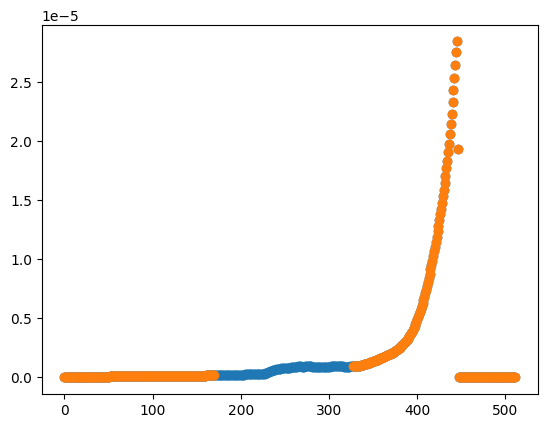

a:  8.224196101684381 b:  -1.6708995967787259e-07


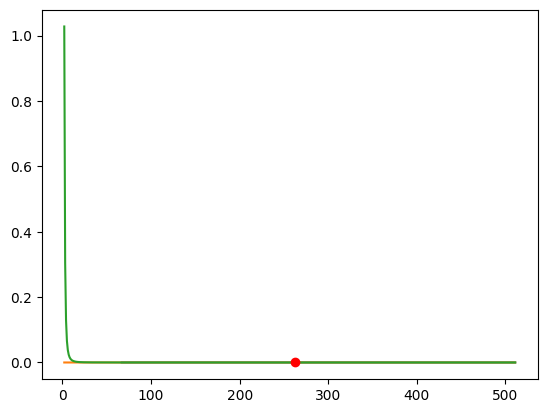

Subtracting  2.8500140510934755e-07  from  7.9125726e-07
[512 249]
ignoring:  78
start:  -341
end:  -185
[-341 -340 -339 -338 -337 -336 -335 -334 -333 -332 -331 -330 -329 -328
 -327 -326 -325 -324 -323 -322 -321 -320 -319 -318 -317 -316 -315 -314
 -313 -312 -311 -310 -309 -308 -307 -306 -305 -304 -303 -302 -301 -300
 -299 -298 -297 -296 -295 -294 -293 -292 -291 -290 -289 -288 -287 -286
 -285 -284 -283 -282 -281 -280 -279 -278 -277 -276 -275 -274 -273 -272
 -271 -270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259 -258
 -257 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245 -244
 -243 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231 -230
 -229 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217 -216
 -215 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203 -202
 -201 -200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188
 -187 -186]


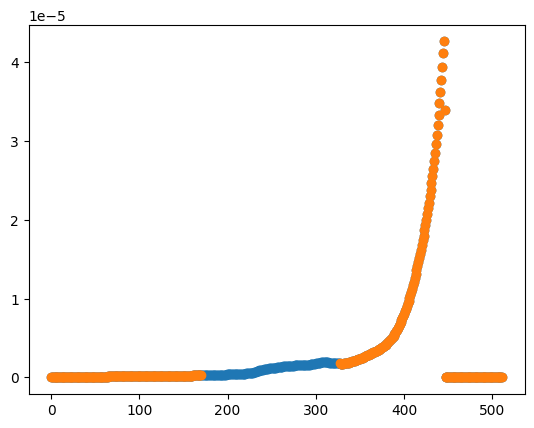

a:  12.3713403124296 b:  -1.219144078738648e-07


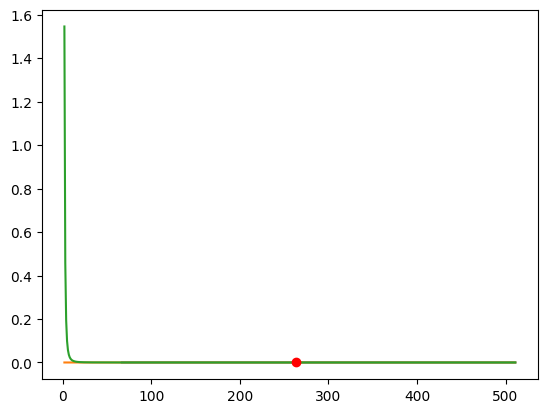

Subtracting  5.581491578463114e-07  from  1.1764895e-06
Processing subtraction for image  31
[512 243]
ignoring:  80
start:  -349
end:  -189
[-349 -348 -347 -346 -345 -344 -343 -342 -341 -340 -339 -338 -337 -336
 -335 -334 -333 -332 -331 -330 -329 -328 -327 -326 -325 -324 -323 -322
 -321 -320 -319 -318 -317 -316 -315 -314 -313 -312 -311 -310 -309 -308
 -307 -306 -305 -304 -303 -302 -301 -300 -299 -298 -297 -296 -295 -294
 -293 -292 -291 -290 -289 -288 -287 -286 -285 -284 -283 -282 -281 -280
 -279 -278 -277 -276 -275 -274 -273 -272 -271 -270 -269 -268 -267 -266
 -265 -264 -263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253 -252
 -251 -250 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238
 -237 -236 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224
 -223 -222 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210
 -209 -208 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196
 -195 -194 -193 -192 -191 -190]


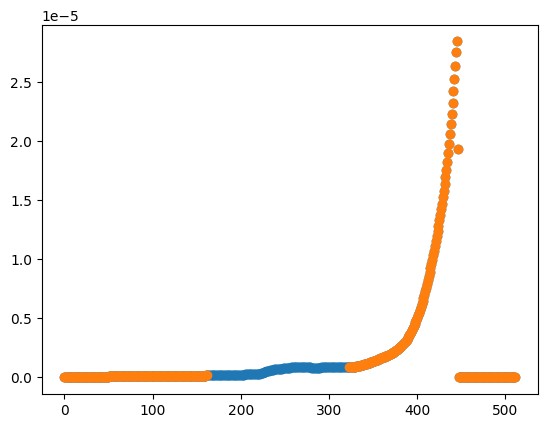

a:  8.186899899255327 b:  -9.353552403197608e-08


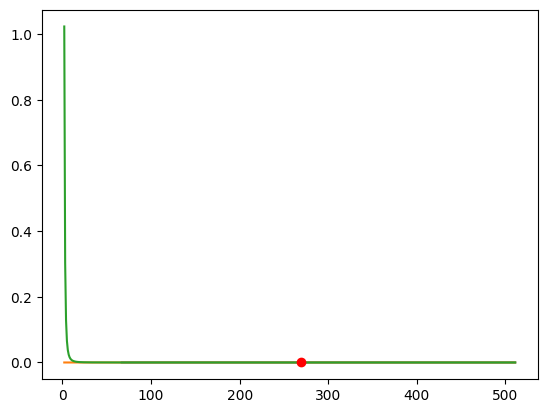

Subtracting  3.2705805698805965e-07  from  7.3154513e-07
[512 243]
ignoring:  80
start:  -349
end:  -189
[-349 -348 -347 -346 -345 -344 -343 -342 -341 -340 -339 -338 -337 -336
 -335 -334 -333 -332 -331 -330 -329 -328 -327 -326 -325 -324 -323 -322
 -321 -320 -319 -318 -317 -316 -315 -314 -313 -312 -311 -310 -309 -308
 -307 -306 -305 -304 -303 -302 -301 -300 -299 -298 -297 -296 -295 -294
 -293 -292 -291 -290 -289 -288 -287 -286 -285 -284 -283 -282 -281 -280
 -279 -278 -277 -276 -275 -274 -273 -272 -271 -270 -269 -268 -267 -266
 -265 -264 -263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253 -252
 -251 -250 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238
 -237 -236 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224
 -223 -222 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210
 -209 -208 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196
 -195 -194 -193 -192 -191 -190]


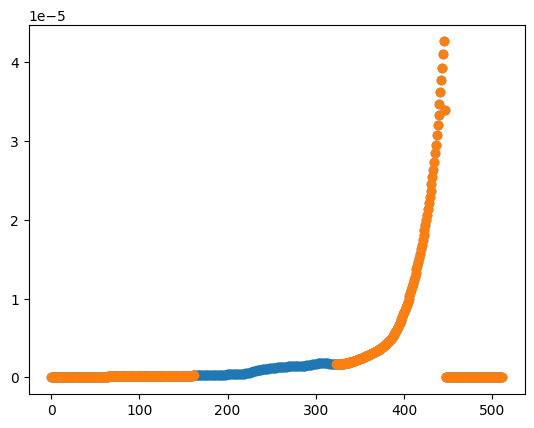

a:  12.300963179892166 b:  -6.5105203633735365e-09


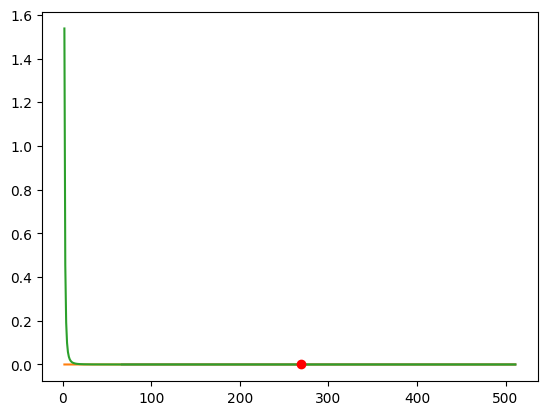

Subtracting  6.254388398941091e-07  from  1.0882901e-06
Processing subtraction for image  32
[512 238]
ignoring:  82
start:  -356
end:  -192
[-356 -355 -354 -353 -352 -351 -350 -349 -348 -347 -346 -345 -344 -343
 -342 -341 -340 -339 -338 -337 -336 -335 -334 -333 -332 -331 -330 -329
 -328 -327 -326 -325 -324 -323 -322 -321 -320 -319 -318 -317 -316 -315
 -314 -313 -312 -311 -310 -309 -308 -307 -306 -305 -304 -303 -302 -301
 -300 -299 -298 -297 -296 -295 -294 -293 -292 -291 -290 -289 -288 -287
 -286 -285 -284 -283 -282 -281 -280 -279 -278 -277 -276 -275 -274 -273
 -272 -271 -270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259
 -258 -257 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245
 -244 -243 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231
 -230 -229 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217
 -216 -215 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203
 -202 -201 -200 -199 -198 -197 -196 -195 -194 -193]


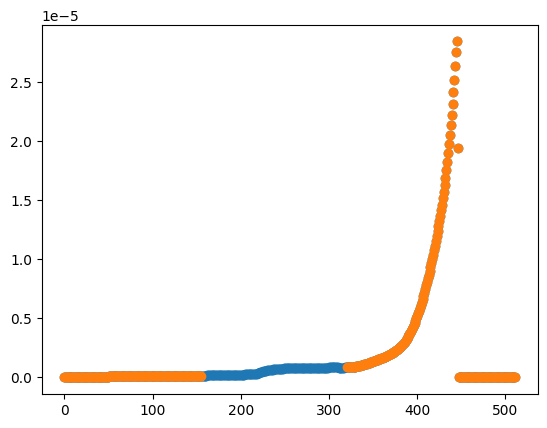

a:  8.153287793468147 b:  -2.1582689243345907e-08


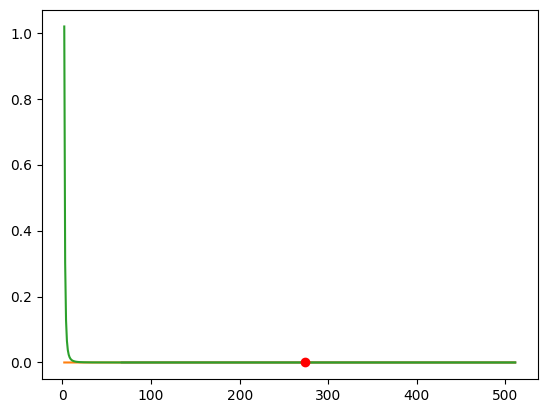

Subtracting  3.7476933795148825e-07  from  6.828266e-07
[512 238]
ignoring:  82
start:  -356
end:  -192
[-356 -355 -354 -353 -352 -351 -350 -349 -348 -347 -346 -345 -344 -343
 -342 -341 -340 -339 -338 -337 -336 -335 -334 -333 -332 -331 -330 -329
 -328 -327 -326 -325 -324 -323 -322 -321 -320 -319 -318 -317 -316 -315
 -314 -313 -312 -311 -310 -309 -308 -307 -306 -305 -304 -303 -302 -301
 -300 -299 -298 -297 -296 -295 -294 -293 -292 -291 -290 -289 -288 -287
 -286 -285 -284 -283 -282 -281 -280 -279 -278 -277 -276 -275 -274 -273
 -272 -271 -270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259
 -258 -257 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245
 -244 -243 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231
 -230 -229 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217
 -216 -215 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203
 -202 -201 -200 -199 -198 -197 -196 -195 -194 -193]


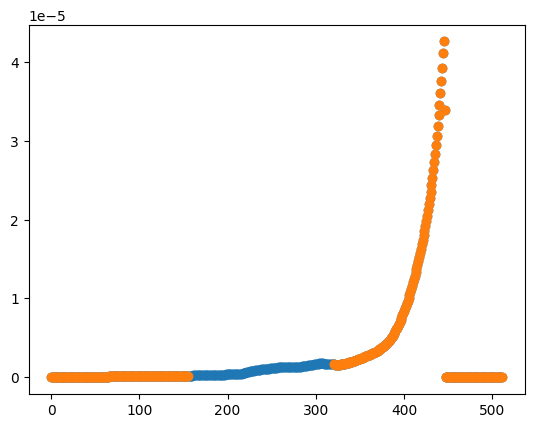

a:  12.237740591465048 b:  1.0478190255619147e-07


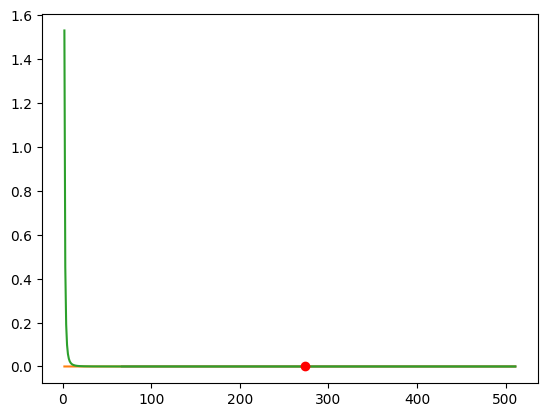

Subtracting  6.996895538717172e-07  from  1.0180472e-06
Processing subtraction for image  33
[512 232]
ignoring:  84
start:  -364
end:  -196
[-364 -363 -362 -361 -360 -359 -358 -357 -356 -355 -354 -353 -352 -351
 -350 -349 -348 -347 -346 -345 -344 -343 -342 -341 -340 -339 -338 -337
 -336 -335 -334 -333 -332 -331 -330 -329 -328 -327 -326 -325 -324 -323
 -322 -321 -320 -319 -318 -317 -316 -315 -314 -313 -312 -311 -310 -309
 -308 -307 -306 -305 -304 -303 -302 -301 -300 -299 -298 -297 -296 -295
 -294 -293 -292 -291 -290 -289 -288 -287 -286 -285 -284 -283 -282 -281
 -280 -279 -278 -277 -276 -275 -274 -273 -272 -271 -270 -269 -268 -267
 -266 -265 -264 -263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253
 -252 -251 -250 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239
 -238 -237 -236 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225
 -224 -223 -222 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211
 -210 -209 -208 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197]


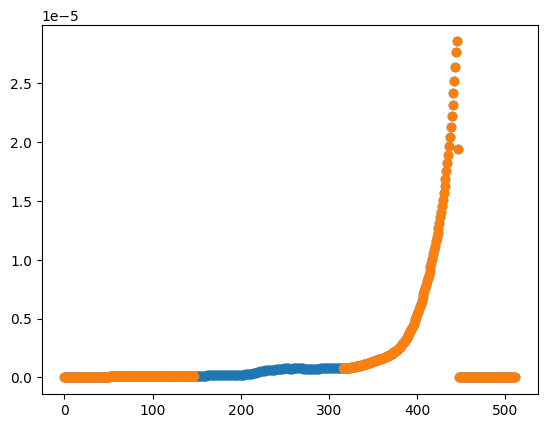

a:  8.11615645720411 b:  7.109001565287916e-08


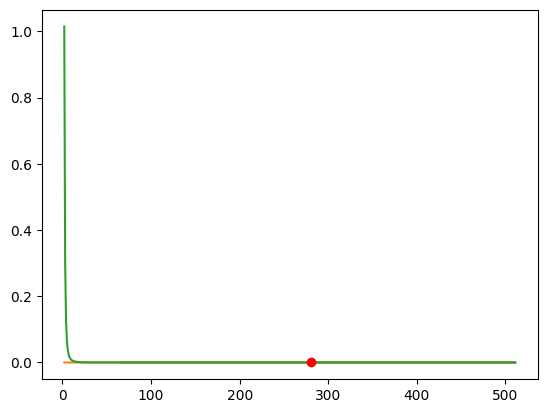

Subtracting  4.4081288633455327e-07  from  6.301778e-07
[512 232]
ignoring:  84
start:  -364
end:  -196
[-364 -363 -362 -361 -360 -359 -358 -357 -356 -355 -354 -353 -352 -351
 -350 -349 -348 -347 -346 -345 -344 -343 -342 -341 -340 -339 -338 -337
 -336 -335 -334 -333 -332 -331 -330 -329 -328 -327 -326 -325 -324 -323
 -322 -321 -320 -319 -318 -317 -316 -315 -314 -313 -312 -311 -310 -309
 -308 -307 -306 -305 -304 -303 -302 -301 -300 -299 -298 -297 -296 -295
 -294 -293 -292 -291 -290 -289 -288 -287 -286 -285 -284 -283 -282 -281
 -280 -279 -278 -277 -276 -275 -274 -273 -272 -271 -270 -269 -268 -267
 -266 -265 -264 -263 -262 -261 -260 -259 -258 -257 -256 -255 -254 -253
 -252 -251 -250 -249 -248 -247 -246 -245 -244 -243 -242 -241 -240 -239
 -238 -237 -236 -235 -234 -233 -232 -231 -230 -229 -228 -227 -226 -225
 -224 -223 -222 -221 -220 -219 -218 -217 -216 -215 -214 -213 -212 -211
 -210 -209 -208 -207 -206 -205 -204 -203 -202 -201 -200 -199 -198 -197]


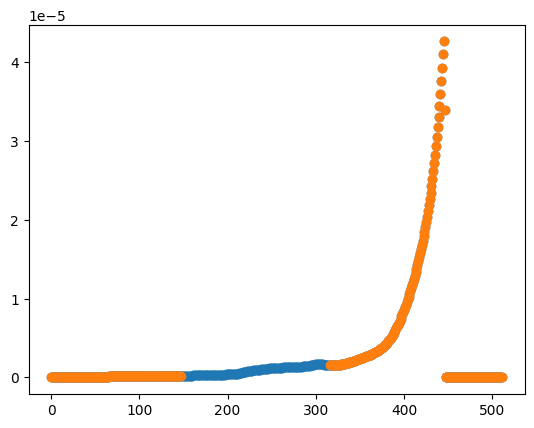

a:  12.165928778857454 b:  2.4930134344918405e-07


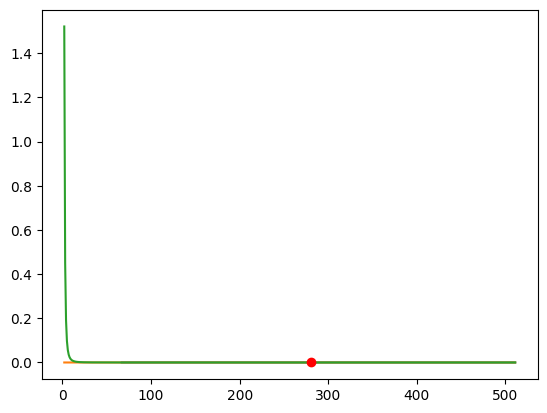

Subtracting  8.03507282719294e-07  from  9.3898694e-07
Processing subtraction for image  34
[512 227]
ignoring:  85
start:  -370
end:  -200
[-370 -369 -368 -367 -366 -365 -364 -363 -362 -361 -360 -359 -358 -357
 -356 -355 -354 -353 -352 -351 -350 -349 -348 -347 -346 -345 -344 -343
 -342 -341 -340 -339 -338 -337 -336 -335 -334 -333 -332 -331 -330 -329
 -328 -327 -326 -325 -324 -323 -322 -321 -320 -319 -318 -317 -316 -315
 -314 -313 -312 -311 -310 -309 -308 -307 -306 -305 -304 -303 -302 -301
 -300 -299 -298 -297 -296 -295 -294 -293 -292 -291 -290 -289 -288 -287
 -286 -285 -284 -283 -282 -281 -280 -279 -278 -277 -276 -275 -274 -273
 -272 -271 -270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259
 -258 -257 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245
 -244 -243 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231
 -230 -229 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217
 -216 -215 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203
 -202 -2

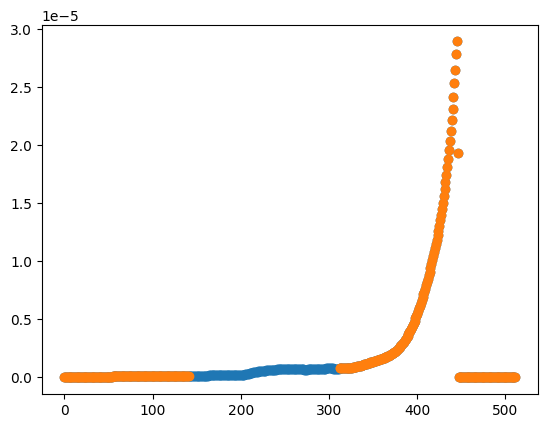

a:  8.099455828283773 b:  1.5043915980350168e-07


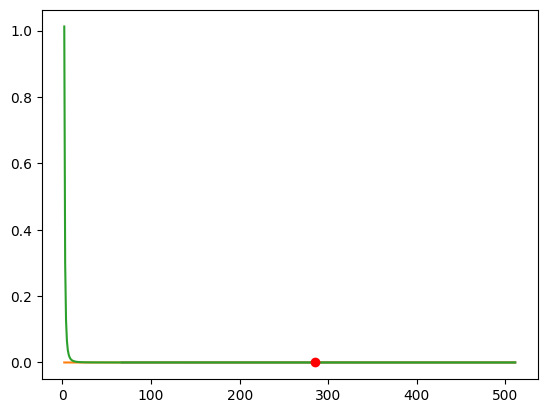

Subtracting  5.003208865764909e-07  from  5.8936325e-07
[512 227]
ignoring:  85
start:  -370
end:  -200
[-370 -369 -368 -367 -366 -365 -364 -363 -362 -361 -360 -359 -358 -357
 -356 -355 -354 -353 -352 -351 -350 -349 -348 -347 -346 -345 -344 -343
 -342 -341 -340 -339 -338 -337 -336 -335 -334 -333 -332 -331 -330 -329
 -328 -327 -326 -325 -324 -323 -322 -321 -320 -319 -318 -317 -316 -315
 -314 -313 -312 -311 -310 -309 -308 -307 -306 -305 -304 -303 -302 -301
 -300 -299 -298 -297 -296 -295 -294 -293 -292 -291 -290 -289 -288 -287
 -286 -285 -284 -283 -282 -281 -280 -279 -278 -277 -276 -275 -274 -273
 -272 -271 -270 -269 -268 -267 -266 -265 -264 -263 -262 -261 -260 -259
 -258 -257 -256 -255 -254 -253 -252 -251 -250 -249 -248 -247 -246 -245
 -244 -243 -242 -241 -240 -239 -238 -237 -236 -235 -234 -233 -232 -231
 -230 -229 -228 -227 -226 -225 -224 -223 -222 -221 -220 -219 -218 -217
 -216 -215 -214 -213 -212 -211 -210 -209 -208 -207 -206 -205 -204 -203
 -202 -201]


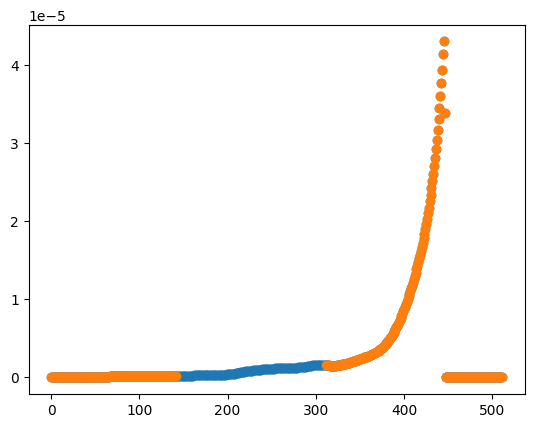

a:  12.120834532158627 b:  3.733606700704267e-07


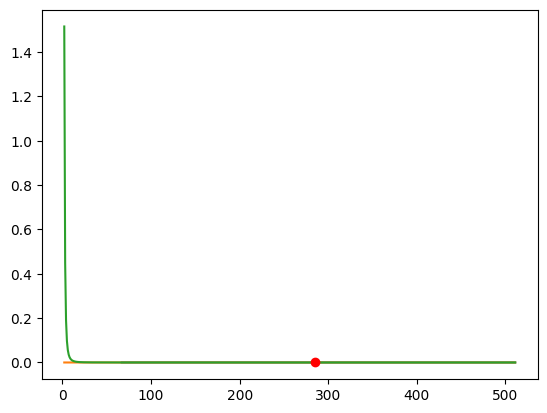

Subtracting  8.969586260259381e-07  from  8.789551e-07
Processing calculations for image  0
Processing calculations for image  1
Processing calculations for image  2
Processing calculations for image  3
Processing calculations for image  4
Processing calculations for image  5
Processing calculations for image  6
Processing calculations for image  7
Processing calculations for image  8
Processing calculations for image  9
Processing calculations for image  10
Processing calculations for image  11
Processing calculations for image  12
Processing calculations for image  13
Processing calculations for image  14
Processing calculations for image  15
Processing calculations for image  16
Processing calculations for image  17


KeyboardInterrupt: 

In [4]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit


#Array of the front of the CME through human analysis

#for first CME

#original
front_array_absolute = [[512,608],[512,640],[512,671],[512,702],[512,730],[512,761],[512,783]]

# +50
# front_array_absolute = [[512,428],[512,397],[512,365],[512,335],[512,300],[512,265],[512,230]]

# -10
# front_array_absolute = [[512,413],[512,392],[512,356],[512,330],[512,304],[512,275],[512,252]]

#                                                           
front_array_absolute = np.array(front_array_absolute)

def linearFunc( x, m, b):
    return m*x + b

parameters, covariance = curve_fit(linearFunc, np.arange(15,50,5), front_array_absolute[:,1])
front_array_absolute = np.zeros((35,2), dtype=int)
front_array_absolute[:,0] = np.full(35, 512)
front_array_absolute[:,1] = np.floor((linearFunc(np.arange(15,50), *parameters)))

plt.figure()
plt.plot(front_array_absolute[:,1])
plt.show()


# xMin = 0
# xMax = 500
xMin = 500
xMax = 1000

yMin = 250
yMax = 750

pBdata = []
tBdata =[]

for i in range(15,50,1):
    if i < 10:
        st = '0' + str(i)
    else:
        st = str(i)
    fits_file_pB = fits.open(f'CME_0_pB\stepnum_0{st}.fits')
    fits_file_tB = fits.open(f'CME_0_tB\stepnum_0{st}.fits')
    pBdata.append(fits_file_pB[0].data)
    tBdata.append(fits_file_tB[0].data)

posMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))
negMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))

kernel_size = 5
kernel = np.full((kernel_size, kernel_size), 1/(kernel_size*kernel_size))

# allIndices = calculateRadialBands(pBdata[0],direction='left')

# print(allIndices)

# for i in range(len(pBdata)):
#     pBdata[i] = signal.convolve2d(pBdata[i], kernel, mode='same', boundary='fill')
#     tBdata[i] = signal.convolve2d(tBdata[i], kernel, mode='same', boundary='fill')



for i in range(len(pBdata)):
    print("Processing subtraction for image ", i)

    #choose subtraction method 
    # median_values_pb, r_values = calculateMedianPixelValues(pBdata[i],allIndices)
    # median_values_tb, r_values = calculateMedianPixelValues(tBdata[i],allIndices)
    # median_values = median_values[13:]
    # r_values = r_values[13:]
  
   

    pBdata[i] = functionFitSubtract(pBdata[i], front_array_absolute[i,:], 'right')
    tBdata[i] = functionFitSubtract(tBdata[i], front_array_absolute[i,:], 'right')
    # pBdata[i] = subtractRadialMedian(pBdata[i], median_values_pb)   
    # tBdata[i] = subtractRadialMedian(tBdata[i],median_values_tb)  
    # pBdata[i] = minSmooth(pBdata[i], 50)  
    # tBdata[i] = minSmooth(tBdata[i], 50)   
    
    # pBdata[i],tBdata[i] = nearbyPointSubtract(pBdata[i],tBdata[i], front_array_absolute[i], 30, allIndices, direction='left')
    

for i in range(len(pBdata)):
    print("Processing calculations for image ", i)
    posMat, negMat = calculateExitAngles(pBdata[i], tBdata[i], (xMin,xMax), (yMin,yMax))
    posMats[i] = posMat
    negMats[i] = negMat

C:\Users\glenn\AppData\Local\Temp\ipykernel_29528\1259405608.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g+" (-> color='g'). The keyword argument will take precedence.
  axs[2,i].plot(front_array_adj[5*i][1], front_array_adj[5*i][0], 'g+', color='lime')


[22.98174272 23.95877603 25.20748582 26.17677402 27.26757544 27.79094813
 28.79114826 29.56115754 30.52549435 31.41860072 32.43739667 33.60366087
 34.79219471 36.00365327 37.07308791 38.55129161 39.8534025  40.56531706
 40.82743106 40.77779207 40.8004342  40.83534445 41.16745949 41.49749796
 42.02602801 42.85349805 43.6938441  44.47539642 45.26383914 46.03217662
 46.88497524 47.59081418 48.37649817 48.96760414 49.69676772]
[-5.75518022 -5.67752603 -6.04732957 -5.96193027 -6.17382544 -5.64251063
 -5.76380451 -5.47912629 -5.56455685 -5.40297572 -5.54286542 -5.65444212
 -5.96406971 -6.12084077 -6.31136916 -6.73488536 -7.15809    -6.81531706
 -6.19852481 -5.09419832 -4.2379342  -3.21815695 -2.67136574 -1.94671671
 -1.59634051 -1.36912305 -1.33056285 -1.05742767 -0.96696414 -0.68061412
 -0.65450649 -0.30565793 -0.21243567  0.25114586  0.40088853]
pos m:  0.7557930743247647
pos b:  24.81800655494659
pos mean:  37.6664888184676
pos sigma: 7.734036346230556
neg m:  0.2110038006752352
neg b:  -

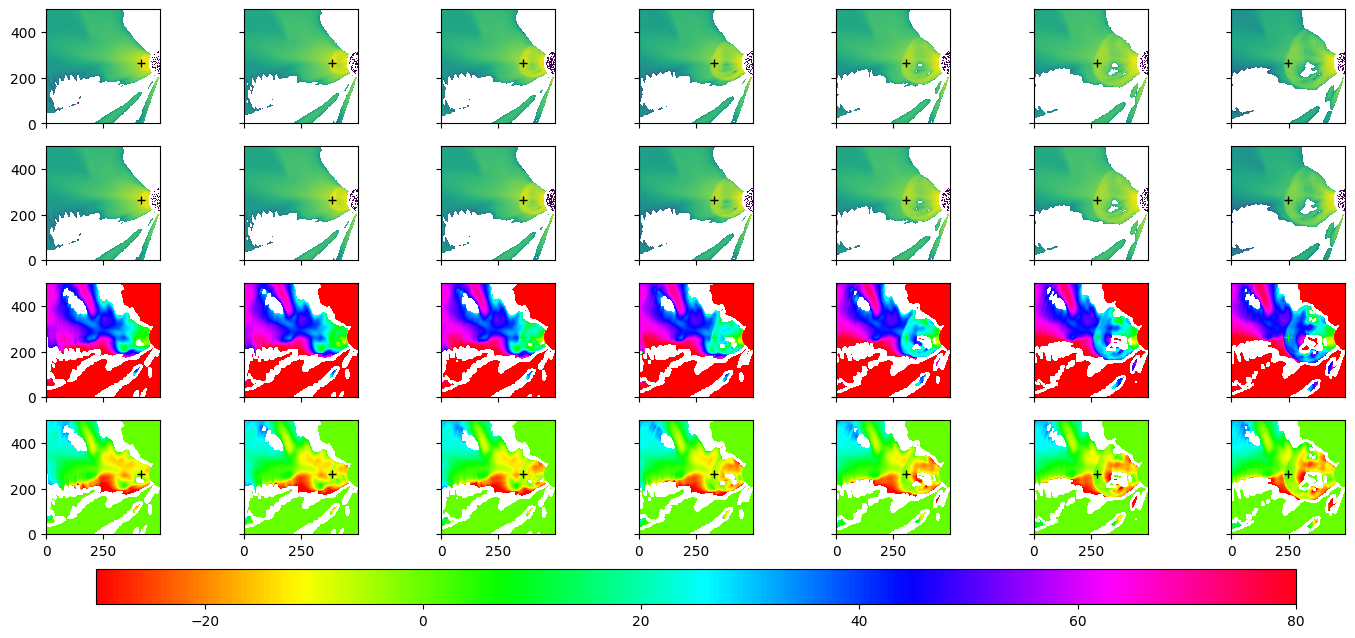

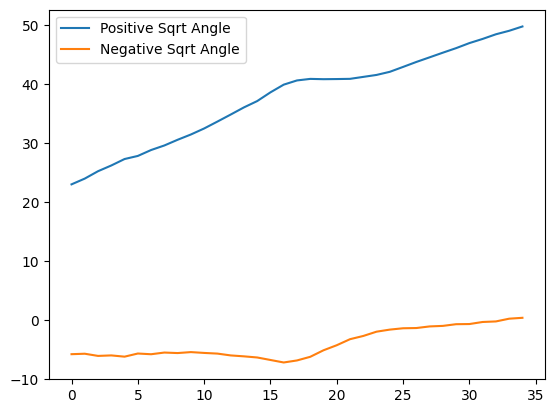

In [ ]:
# xMin = 0
# xMax = 500
xMin = 500
xMax = 1000

yMin = 250
yMax = 750


vmin = -30
vmax = 80

front_array_adj = front_array_absolute - np.array([yMin,xMin])
#plot the images with the front of the CME marked

fig, axs = plt.subplots(4,7,figsize=(15, 7), sharex=True, sharey=True)

for i in range(7): 
    
    axs[0,i].imshow(pBdata[5*i][yMin:yMax,xMin:xMax], origin='lower', norm=LogNorm())
    axs[1,i].imshow(pBdata[5*i][yMin:yMax,xMin:xMax], origin='lower', norm=LogNorm())
    axs[2,i].imshow(posMats[5*i][yMin:yMax,xMin:xMax], origin='lower', vmax=vmax, cmap='hsv')
    im = axs[3,i].imshow(negMats[5*i][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')



for i in range(7):
    axs[0,i].plot(front_array_adj[5*i][1], front_array_adj[5*i][0], 'k+')
    axs[1,i].plot(front_array_adj[5*i][1], front_array_adj[5*i][0], 'k+')
    axs[2,i].plot(front_array_adj[5*i][1], front_array_adj[5*i][0], 'g+', color='lime')
    axs[3,i].plot(front_array_adj[5*i][1], front_array_adj[5*i][0], 'k+')

fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.2)

cbar_ax = fig.add_axes([0.1, 0.1, 0.8, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')


xMin = 0
xMax = 1023

yMin = 0
yMax = 1023

posMatsData = posMats[:,yMin:yMax,xMin:xMax]
negMatsData = negMats[:,yMin:yMax,xMin:xMax]
posMatsGraph = np.zeros(len(posMatsData))
negMatsGraph = np.zeros(len(negMatsData))

for i in range(len(posMatsData)):
    posMatsGraph[i] = posMatsData[i][front_array_absolute[i][0],front_array_absolute[i][1]]
    negMatsGraph[i] = negMatsData[i][front_array_absolute[i][0],front_array_absolute[i][1]]
print(posMatsGraph)
print(negMatsGraph)

posCoef = np.polyfit(np.arange(0,35),posMatsGraph,1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])
print("pos mean: ", np.mean(posMatsGraph))
print("pos sigma:", np.std(posMatsGraph))



negCoef = np.polyfit(np.arange(0,35),negMatsGraph,1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])
print("neg mean: ", np.mean(negMatsGraph))
print("neg sigma:", np.std(negMatsGraph))
# poly1d_fn = np.poly1d(posCoef) 


plt.figure()   
plt.plot(posMatsGraph, label='Positive Sqrt Angle')
plt.plot(negMatsGraph, label='Negative Sqrt Angle') 
plt.legend() 
plt.show()

In [ ]:

print(front_array_adj[2])
print(posMatsData[2][front_array_adj[2][0],front_array_adj[2][1]])

[262 403]
0.0
